## What goes in and out the canyon box


In [1]:
#import gsw as sw # Gibbs seawater package

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

#from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import MetricsPythonTools as mpt


In [3]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('talk')

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
#Exp
CGrid = '/Users/Karina/Research/PhD/Tracers/TemporaryData/BARKLEY/run01/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
#CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
CGridOut = Dataset(CGrid)

#CGridNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run07/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
#CGridNoCOut = Dataset(CGridNoC)


In [5]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 22 # number of tracers in total (CNT =22, 3D = 4, total = 19)

rc = CGridOut.variables['RC']

xc = rout.getField(CGrid, 'XC') # x coords tracer cells
yc = rout.getField(CGrid, 'YC') # y coords tracer cells

drF = CGridOut.variables['drF'] # vertical distance between faces
drC = CGridOut.variables['drC'] # vertical distance between centers

labels = ['Kv=1E-7(out), 1E-3(in), Ki=1','Kv=1E-7(out), 1E-4(in), Ki=1','Kv=1E-5(out), 1E-3(in), Ki=1',
          'Kv=1E-5(out), 1E-4(in), Ki=1','Kv=1E-5, Ki=1','Kv=1E-4, Ki=1','Kv=1E-3, Ki=1','Kv=3.8E-5, Ki=10',
          'Kv=2.8E-5, Ki=10','Kv=1.3E-5, Ki=10','Kv_noc=1E-5, Ki=1','Kv_noc=1E-4, Ki=1','Kv_noc=1E-3, Ki=1',
          'Kv=1E-5, Ki=10','Kv=1E-4, Ki=10','Kv=1E-3, Ki=10','Kv=1E-5, Ki=0.1','Kv=1E-4, Ki=0.1',
          'Kv=1E-3, Ki=0.1','Kv=3.8E-5, Ki=1','Kv=2.8E-5, Ki=1','Kv=1.3E-5, Ki=1']

wlabels = ['run04 - 3D','run05 - 3D','run06 - 3D','run07 - 3D','run02 - CNT','run03 - CNT','run04 - CNT',
           'run07 - CNT','run09 - CNT','run10 - CNT']


times = np.arange(0,nt,1)

#print(drC[:])
#print(np.shape(drC))

In [6]:
def get_metrics(exp, run, TrNum, key):
    '''Get column from a tracer metrics pandas dataframe using the key name, run (01, 02, etc) and experiment 
    abreviated name (BAR, CNTDIFF, 3DDIFF, NOGMREDI). All input variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(('results/metricsDataFrames/%srun%sTr%s.csv' %(exp,run,TrNum)))
    col = df[key]
    return col

In [7]:
def get_water(exp, run, key):
    '''Get column from a tracer metrics pandas dataframe using the key name, run (01, 02, etc) and experiment 
    abreviated name (BAR, CNTDIFF, 3DDIFF, NOGMREDI). All input variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(('results/metricsDataFrames/%srun%s.csv' %(exp,run)))
    col = df[key]
    return col

In [8]:
def get_areas(file, key):
    '''Get column from a tracer metrics pandas dataframe using the key name, run (01, 02, etc) and experiment 
    abreviated name (BAR, CNTDIFF, 3DDIFF, NOGMREDI). All input variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(file)
    col = df[key]
    return col


In [9]:
df = pd.read_csv('results/metricsDataFrames/Canyon_AreasVolumes.csv')

CS1A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS1area' )
CS2A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS2area' )
CS3A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS3area' )
CS3sbA = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS3sbarea' )
CS4A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS4area' )
CS5A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS5area' )
AS1A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'AS1area' )
AS2A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'AS2area' )
LID1A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'LID1area' )
LID2A = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'LID2area' )
VolHole = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'VolHole'  )
VoleShwoHole = get_areas('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'VolShNoHole' )

df

,Unnamed: 0,CS1area,CS2area,CS3area,CS3sbarea,CS4area,CS5area,AS1area,AS2area,LID1area,LID2area,VolHole,VolShNoHole
0,0,3276715.686275,4045784.313725,1941643.205977,2755000,4045784.313725,3185391.812071,973705.821267,972272.840065,40422963.498198,40422963.498198,2.029953e+10,2.352605e+11


In [10]:
# Just to know what's in there...
df = pd.read_csv('results/metricsDataFrames/CNTDIFF_hole_run03Tr1.csv')
df.head(1)
df = pd.read_csv('results/metricsDataFrames/CNTDIFF_CSTRANS_run03Tr1.csv')
df.head(1)

,Unnamed: 0,day,CS1,CS2,CS3,CS3sb,CS4,CS5,AS1,AS2,LID1,LID2
0,0,0.5,-0.25493,-0.684323,6.055359,0.585206,-4.642526,-0.225827,31.493553,37.763626,0.109782,0.540553


In [11]:
# load Tracer on shelf

tracers_3D = ['04','05','06','07'] #run number because there's only 1 tr per run
tracers_CNT03 = ['1','2','3'] # tracer number , constant runs
tracers_CNT09 = ['1','2','3'] # tracer number , average diffusivity runs
tracers_CNT07 = ['1','2','3'] # tracer number , no canyon case
tracers_CNT02 = ['1','2','3'] # tracer number , Kiso=0.1
tracers_CNT04 = ['1','2','3'] # tracer number , Kiso=10
tracers_CNT10 = ['1','2','3'] # tracer number , Kiso=1

TrOnSh = np.zeros((nt,numTr)) 
HWC = np.zeros((nt,numTr)) 

kk = 0

fields = ['TronShelfwHole', 'HCWonShelfwHole','TronHole','HCWonHole']

for ii in tracers_3D:
    
    TrOnShwHole = get_metrics('3DDIFF_hole_', ii, '1', fields[0] )
    TrOnHole = get_metrics('3DDIFF_hole_', ii, '1', fields[2] )
    
    TrOnSh[:,kk] =  TrOnHole
    
    HWCsh = get_metrics('3DDIFF_hole_', ii, '1', fields[1] )
    HWChole = get_metrics('3DDIFF_hole_', ii, '1', fields[1] )
    
    HWC[:,kk] =  HWChole  
    
    kk=kk+1

for ii in tracers_CNT03:
    
    TrOnShwHole = get_metrics('CNTDIFF_hole_',  '03',ii, fields[0] )
    TrOnHole = get_metrics('CNTDIFF_hole_', '03', ii, fields[2] )
    
    TrOnSh[:,kk] = TrOnHole
    
    HWCsh = get_metrics('CNTDIFF_hole_',  '03', ii,fields[1] )
    HWChole = get_metrics('CNTDIFF_hole_',  '03',ii,  fields[1] )
    
    HWC[:,kk] =  HWChole  
    
    kk=kk+1

for ii in tracers_CNT09:
    
    TrOnShwHole = get_metrics('CNTDIFF_hole_',  '09',ii, fields[0] )
    TrOnHole = get_metrics('CNTDIFF_hole_','09',ii, fields[2] )
    
    TrOnSh[:,kk] = TrOnHole
    
    HWCsh = get_metrics('CNTDIFF_hole_',  '09',ii, fields[1] )
    HWChole = get_metrics('CNTDIFF_hole_',  '09',ii, fields[1] )
    
    HWC[:,kk] =  HWChole  
    
    kk=kk+1

for ii in tracers_CNT07:
    
    
    TrSh = get_metrics('CNTDIFF_hole_', '07', ii, fields[0] )
    TrHole= get_metrics('CNTDIFF_hole_', '07', ii, fields[2] )
    
    HWCSh = get_metrics('CNTDIFF_hole_', '07', ii, fields[1] )
    HWCHole = get_metrics('CNTDIFF_hole_', '07', ii, fields[3] )
    
    TrOnSh[:,kk] =  TrHole 
    HWC[:,kk] =  HWCHole
    
    kk=kk+1

for ii in tracers_CNT02:
    
    TrOnShwHole = get_metrics('CNTDIFF_hole_',  '02',ii, fields[0] )
    TrOnHole = get_metrics('CNTDIFF_hole_',  '02',ii, fields[2] )
    
    TrOnSh[:,kk] =  TrOnHole
    
    HWCsh = get_metrics('CNTDIFF_hole_', '02',ii, fields[1] )
    HWChole = get_metrics('CNTDIFF_hole_',  '02', ii,fields[1] )
    HWC[:,kk] =  HWChole  
    
    kk=kk+1

for ii in tracers_CNT04:
    
    TrOnShwHole = get_metrics('CNTDIFF_hole_',  '04',ii, fields[0] )
    TrOnHole = get_metrics('CNTDIFF_hole_', '04',ii, fields[2] )
    
    TrOnSh[:,kk] =  TrOnHole
    
    HWCsh = get_metrics('CNTDIFF_hole_',  '04',ii, fields[1] )
    HWChole = get_metrics('CNTDIFF_hole_',  '04',ii, fields[1] )
    HWC[:,kk] =  HWChole  
    
    kk=kk+1

for ii in tracers_CNT10:
    
    TrOnShwHole = get_metrics('CNTDIFF_hole_', '10',ii, fields[0] )
    TrOnHole = get_metrics('CNTDIFF_hole_', '10',ii, fields[2] )
    
    TrOnSh[:,kk] = TrOnHole
    
    HWCsh = get_metrics('CNTDIFF_hole_', '10',ii, fields[1] )
    HWChole = get_metrics('CNTDIFF_hole_',  '10',ii, fields[1] )
    
    HWC[:,kk] =  HWChole  
    
    
    kk=kk+1

print(kk)

22


In [12]:
# load transports

tracers_3D = ['04','05','06','07'] #run number because there's only 1 tr per run
tracers_CNT03 = ['1','2','3'] # tracer number , constant runs
tracers_CNT09 = ['1','2','3'] # tracer number , average diffusivity runs Kiso=1
tracers_CNT07 = ['1','2','3'] # tracer number , no canyon case
tracers_CNT02 = ['1','2','3'] # tracer number , Kiso=10
tracers_CNT04 = ['1','2','3'] # tracer number , Kiso=0.1
tracers_CNT10 = ['1','2','3'] # tracer number , Kiso=0.1

CS1 = np.zeros((nt-1,numTr)) 
CS2 = np.zeros((nt-1,numTr)) 
CS3 = np.zeros((nt-1,numTr)) 
CS4 = np.zeros((nt-1,numTr)) 
CS5 = np.zeros((nt-1,numTr)) 
CS3sb = np.zeros((nt-1,numTr)) 
AS1 = np.zeros((nt-1,numTr)) 
AS2 = np.zeros((nt-1,numTr)) 
LID1 = np.zeros((nt-1,numTr)) 
LID2 = np.zeros((nt-1,numTr)) 

kk = 0

fields = ['CS1','CS2','CS3','CS3sb','CS4','CS5','AS1' ,'AS2','LID1' ,'LID2']

for ii in tracers_3D:
    
    CS1[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[0] )
    CS2[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[1] )
    CS3[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[2] )
    CS3sb[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[3] )
    CS4[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[4] )
    CS5[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[5] )
    AS1[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[6] )
    AS2[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[7] )
    LID1[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[8] )
    LID2[:,kk] = get_metrics('3DDIFF_CSTRANS_', ii, '1', fields[9] )
    
    kk=kk+1
    

for ii in tracers_CNT03:
    
    CS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[0] )
    CS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[1] )
    CS3[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[2] )
    CS3sb[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[3] )
    CS4[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[4] )
    CS5[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[5] )
    AS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[6] )
    AS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[7] )
    LID1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[8] )
    LID2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '03', ii, fields[9] )
    
    kk=kk+1

for ii in tracers_CNT09:
    
    CS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[0] )
    CS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[1] )
    CS3[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[2] )
    CS3sb[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[3] )
    CS4[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[4] )
    CS5[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[5] )
    AS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[6] )
    AS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[7] )
    LID1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[8] )
    LID2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '09', ii, fields[9] )
      
    kk=kk+1

for ii in tracers_CNT07:
    
    CS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[0] )
    CS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[1] )
    CS3[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[2] )
    CS3sb[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[3] )
    CS4[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[4] )
    CS5[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[5] )
    AS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[6] )
    AS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[7] )
    LID1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[8] )
    LID2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '07', ii, fields[9] )
      
    kk=kk+1

for ii in tracers_CNT02:
    
    CS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '02', ii, fields[0] )
    CS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '02', ii, fields[1] )
    CS3[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '02', ii, fields[2] )
    CS3sb[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '02', ii, fields[3] )
    CS4[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '02', ii, fields[4] )
    CS5[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '02', ii, fields[5] )
    AS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '02', ii, fields[6] )
    AS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '02', ii, fields[7] )
    LID1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '02', ii, fields[8] )
    LID2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '02', ii, fields[9] )
    
    kk=kk+1

for ii in tracers_CNT04:
    
    CS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '04', ii, fields[0] )
    CS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '04', ii, fields[1] )
    CS3[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '04', ii, fields[2] )
    CS3sb[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '04', ii, fields[3] )
    CS4[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '04', ii, fields[4] )
    CS5[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '04', ii, fields[5] )
    AS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '04', ii, fields[6] )
    AS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '04', ii, fields[7] )
    LID1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '04', ii, fields[8] )
    LID2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '04', ii, fields[9] )
    
    kk=kk+1

for ii in tracers_CNT10:
    
    CS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '10', ii, fields[0] )
    CS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '10', ii, fields[1] )
    CS3[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '10', ii, fields[2] )
    CS3sb[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '10', ii, fields[3] )
    CS4[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '10', ii, fields[4] )
    CS5[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '10', ii, fields[5] )
    AS1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '10', ii, fields[6] )
    AS2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '10', ii, fields[7] )
    LID1[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '10', ii, fields[8] )
    LID2[:,kk] = get_metrics('CNTDIFF_CSTRANS_', '10', ii, fields[9] )
    
    kk=kk+1


kk

22

In [13]:
# load transports

numWat = 10

water_3D = ['04','05','06','07'] #run number 
water_CNT = ['02','03','04','07','09','10'] # run number , constant runs

wCS1 = np.zeros((nt-1,numWat)) 
wCS2 = np.zeros((nt-1,numWat)) 
wCS3 = np.zeros((nt-1,numWat)) 
wCS4 = np.zeros((nt-1,numWat)) 
wCS5 = np.zeros((nt-1,numWat)) 
wCS3sb = np.zeros((nt-1,numWat)) 
wAS1 = np.zeros((nt-1,numWat)) 
wAS2 = np.zeros((nt-1,numWat)) 
wLID1 = np.zeros((nt-1,numWat)) 
wLID2 = np.zeros((nt-1,numWat)) 

kk = 0

fields = ['CS1','CS2','CS3','CS3sb','CS4','CS5','AS1' ,'AS2','LID1' ,'LID2']

for ii in water_3D:
    
    wCS1[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[0] )
    wCS2[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[1] )
    wCS3[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[2] )
    wCS3sb[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[3] )
    wCS4[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[4] )
    wCS5[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[5] )
    wAS1[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[6] )
    wAS2[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[7] )
    wLID1[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[8] )
    wLID2[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[9] )
    
    kk=kk+1
    

for ii in water_CNT:
    
    wCS1[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[0] )
    wCS2[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[1] )
    wCS3[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[2] )
    wCS3sb[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[3] )
    wCS4[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',   ii, fields[4] )
    wCS5[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',   ii, fields[5] )
    wAS1[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',   ii, fields[6] )
    wAS2[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',   ii, fields[7] )
    wLID1[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[8] )
    wLID2[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[9] )
    
    
    
    kk=kk+1



## Definition of sections 

Canyon box is the volume on top of the canyon formed by the walls AS1, AS2, 1000.0*CS3A[0]*CS3, 1000.0*CS3sbA[[0]*CS3sb, the floor LID1 and LID2 at z[30]= shelf break, and the surface.
<img src="figs/CrossShelfPlanes.png">

### Transports across canyon box walls   CALCULATE AREAS OF TRANSECTS

The base case for the runs is CNTDIFF with $K_v = 10^{-5}m^2s^{-1}$ and $K_{iso} = 1.0 m^2s^{-1}$ (tracer index 4)

In [14]:
LID1A

0    40422963.498198
Name: LID1area, dtype: float64

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


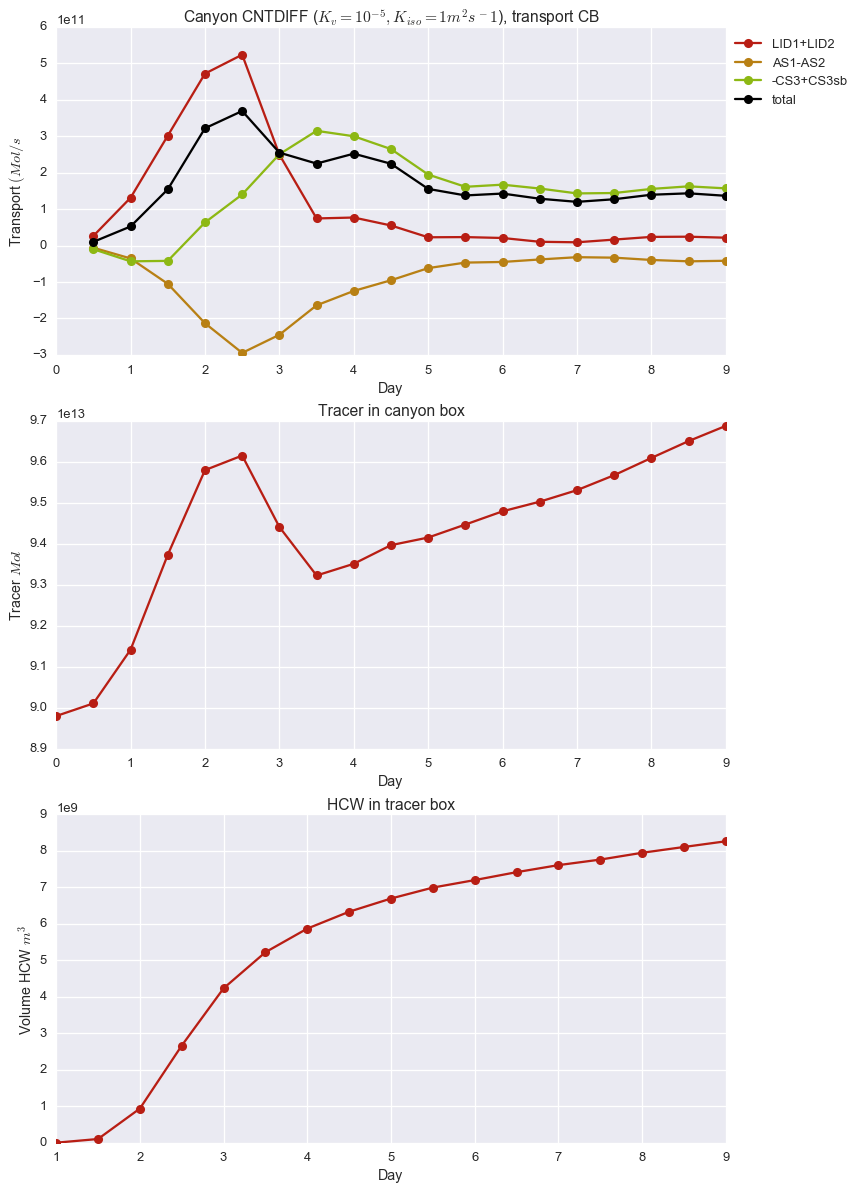

In [15]:
sns.set_palette( sns.hls_palette(10, l=.4, s=.8)) 

fig45=plt.figure(figsize=(12,20))

vertical1 = LID1[:,4]*LID1A[0]*1000.0 + LID2[:,4]*LID2A[0]*1000.0
total1 =  (AS1[:,4]*AS1A[0] - AS2[:,4]*AS2A[0] - CS3A[0]*CS3[:,4] + CS3sbA[0]*CS3sb[:,4]+LID1[:,4]*LID1A[0] + 
           LID2[:,4]*LID2A[0])*1000.0

ax1 = plt.subplot(3,1,1)
ax1.plot(times[1:]/2.0, (LID1[:,4]*LID1A[0]+LID2[:,4]*LID2A[0])*1000.0,'o-', label = 'LID1+LID2')
ax1.plot(times[1:]/2.0, (AS1[:,4]*AS1A[0]-AS2[:,4]*AS2A[0])*1000.0,'o-', label = 'AS1-AS2')
ax1.plot(times[1:]/2.0, (-CS3A[0]*CS3[:,4] +CS3sbA[0]*CS3sb[:,4])*1000.0 ,'o-', label = '-CS3+CS3sb')
ax1.plot(times[1:]/2.0, total1,'ko-', label = 'total')


plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))
plt.ylabel('Transport $(Mol/s$ ')
plt.xlabel('Day')
plt.title('Canyon CNTDIFF ($K_v=10^{-5}, K_{iso}=1 m^2s^-1$), transport CB')

ax1 = plt.subplot(3,1,2)
ax1.plot(times[0:]/2.0, TrOnSh[:,4],'o-')


plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))
plt.ylabel('Tracer $Mol$ ')
plt.xlabel('Day')
plt.title('Tracer in canyon box')

ax1 = plt.subplot(3,1,3)
ax1.plot(times[0:]/2.0, HWC[:,4],'o-')


plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))
plt.ylabel('Volume HCW $m^3$ ')
plt.xlabel('Day')
plt.title('HCW in tracer box')

#fig45.savefig('results/figures/CStransport/CSTransportCNT_3Tr_difference.eps', format='eps', dpi=1000, bbox_inches='tight')




Into the box is positive and out of the box is negative. The net transport of tracer concentration of the canyon box is negative throughout the entire run. During the time dependent phase, tracer ascends through the canyon, and leaves through AS2 and 1000.0*CS3A[0]*CS3 (canyon head). The maximum export of water occurrs at 2.5 days after which tracer stars entering the box through 1000.0*CS3sbA[[0]*CS3sb and leaves through AS2. The advective phase is dominated bay the balance of water entering through 1000.0*CS3sbA[[0]*CS3sb and leaving through AS2.

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


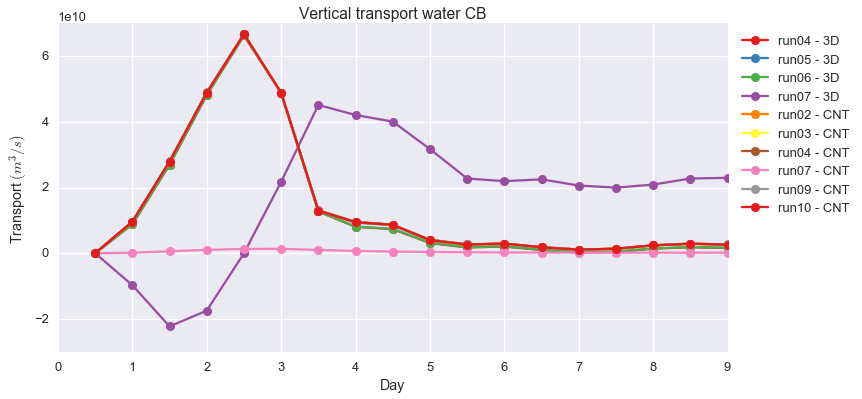

In [16]:
sns.set_palette('Set1',10) 

fig45=plt.figure(figsize=(12,20))

watVert0 = LID1A[0]*1000.0*wLID1[:,0] + LID2A[0]*1000.0*wLID2[:,0] 
watTot0 =  +1000.0*AS1A[0]*wAS1[:,0] -1000.0*AS2A[0]*wAS2[:,0]  - 1000.0*CS3A[0]*wCS3[:,0] + 1000.0*CS3sbA[0]*wCS3sb[:,0] 
watVert1 = LID1A[0]*1000.0*wLID1[:,1] + LID2A[0]*1000.0*wLID2[:,1] 
watTot1 =  +1000.0*AS1A[0]*wAS1[:,1] -1000.0*AS2A[0]*wAS2[:,1]  - 1000.0*CS3A[0]*wCS3[:,1] + 1000.0*CS3sbA[0]*wCS3sb[:,1] 
watVert2 = LID1A[0]*1000.0*wLID1[:,2] + LID2A[0]*1000.0*wLID2[:,2] 
watTot2 =  +1000.0*AS1A[0]*wAS1[:,2] -1000.0*AS2A[0]*wAS2[:,2]  - 1000.0*CS3A[0]*wCS3[:,2] + 1000.0*CS3sbA[0]*wCS3sb[:,2] 
watVert3 = LID1A[0]*1000.0*wLID1[:,3] + LID2A[0]*1000.0*wLID2[:,3] 
watTot3 =  +1000.0*AS1A[0]*wAS1[:,3] -1000.0*AS2A[0]*wAS2[:,3]  - 1000.0*CS3A[0]*wCS3[:,3] + 1000.0*CS3sbA[0]*wCS3sb[:,3] 
watVert4 = LID1A[0]*1000.0*wLID1[:,4] + LID2A[0]*1000.0*wLID2[:,4] 
watTot4 =  +1000.0*AS1A[0]*wAS1[:,4] -1000.0*AS2A[0]*wAS2[:,4]  - 1000.0*CS3A[0]*wCS3[:,4] + 1000.0*CS3sbA[0]*wCS3sb[:,4] 
watVert5 = LID1A[0]*1000.0*wLID1[:,5] + LID2A[0]*1000.0*wLID2[:,5] 
watTot5 =  +1000.0*AS1A[0]*wAS1[:,5] -1000.0*AS2A[0]*wAS2[:,5]  - 1000.0*CS3A[0]*wCS3[:,5] + 1000.0*CS3sbA[0]*wCS3sb[:,5] 
watVert6 = LID1A[0]*1000.0*wLID1[:,6] + LID2A[0]*1000.0*wLID2[:,6] 
watTot6 =  +1000.0*AS1A[0]*wAS1[:,6] -1000.0*AS2A[0]*wAS2[:,6]  - 1000.0*CS3A[0]*wCS3[:,6] + 1000.0*CS3sbA[0]*wCS3sb[:,6] 
watVert7 = LID1A[0]*1000.0*wLID1[:,7] + LID2A[0]*1000.0*wLID2[:,7] 
watTot7 =  +1000.0*AS1A[0]*wAS1[:,7] -1000.0*AS2A[0]*wAS2[:,7]  - 1000.0*CS3A[0]*wCS3[:,7] + 1000.0*CS3sbA[0]*wCS3sb[:,7] 
watVert8 = LID1A[0]*1000.0*wLID1[:,8] + LID2A[0]*1000.0*wLID2[:,8] 
watTot8 =  +1000.0*AS1A[0]*wAS1[:,8] -1000.0*AS2A[0]*wAS2[:,8]  - 1000.0*CS3A[0]*wCS3[:,8] + 1000.0*CS3sbA[0]*wCS3sb[:,8] 
watVert9 = LID1A[0]*1000.0*wLID1[:,9] + LID2A[0]*1000.0*wLID2[:,9] 
watTot9 =  +1000.0*AS1A[0]*wAS1[:,9] -1000.0*AS2A[0]*wAS2[:,9]  - 1000.0*CS3A[0]*wCS3[:,9] + 1000.0*CS3sbA[0]*wCS3sb[:,9] 

watTotList = [watTot0,watTot1,watTot2,watTot3,watTot4,watTot5,watTot6,watTot7,watTot8,watTot9 ]
watVertList = [watVert0,watVert1,watVert2,watTot3,watVert4,watVert5,watVert6,watVert7,watVert8,watVert9 ]

ii=0
for vert in watVertList:
    ax1 = plt.subplot(3,1,1)
    ax1.plot(times[1:]/2.0, vert,'o-', label = wlabels[ii])
    plt.ylabel('Transport $(m^3/s)$ ')
    plt.xlabel('Day')
    plt.title('Vertical transport water CB')
    ii=ii+1

plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))

#fig45.savefig('results/figures/CStransport/CSTransportCNT_3Tr_difference.eps', format='eps', dpi=1000, bbox_inches='tight')


### Changing constant diffusivity 

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


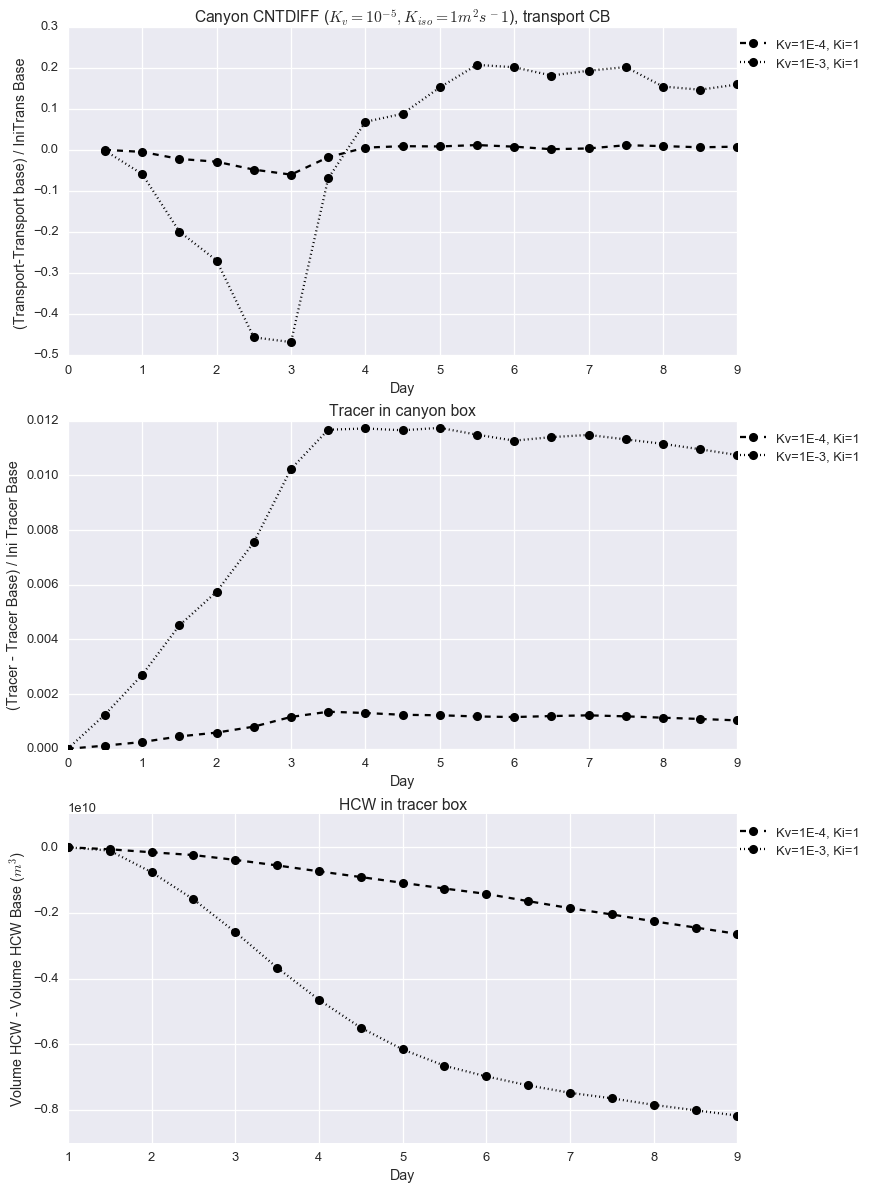

In [17]:
sns.set_palette( sns.hls_palette(10, l=.4, s=.8)) 

fig45=plt.figure(figsize=(12,20))

total1 =  + AS1[:,4] - AS2[:,4] - CS3[:,4] + CS3sb[:,4]+LID1[:,4] + LID2[:,4]
total2 =  + AS1[:,5] - AS2[:,5] - CS3[:,5] + CS3sb[:,5]+LID1[:,5] + LID2[:,5]
total3 =  + AS1[:,6] - AS2[:,6] - CS3[:,6] + CS3sb[:,6]+LID1[:,6] + LID2[:,6]

ax1 = plt.subplot(3,1,1)
#ax1.plot(times[1:]/2.0, LID1[:,4]+LID2[:,4],'o-', label = 'LID1+LID2')
#ax1.plot(times[1:]/2.0, +AS1[:,4]-AS2[:,4],'o-', label = 'AS1-AS2')
#ax1.plot(times[1:]/2.0, -1000.0*CS3A[0]*CS3[:,4]+1000.0*CS3sbA[[0]*CS3sb[:,4],'o-', label = '-1000.0*CS3A[0]*CS3+1000.0*CS3sbA[[0]*CS3sb')
#ax1.plot(times[1:]/2.0, total1-total/total1[0],'ko-', label = labels[4])
#ax1.plot(times[1:]/2.0, LID1[:,5]+LID2[:,5],'o-', label = 'LID1+LID2')
#ax1.plot(times[1:]/2.0, +AS1[:,5]-AS2[:,5],'o-', label = 'AS1-AS2')
#ax1.plot(times[1:]/2.0, -1000.0*CS3A[0]*CS3[:,5]+1000.0*CS3sbA[[0]*CS3sb[:,5],'o-', label = '-1000.0*CS3A[0]*CS3+1000.0*CS3sbA[[0]*CS3sb')
ax1.plot(times[1:]/2.0, (total2-total1)/total1[0],'ko--', label = labels[5])
#ax1.plot(times[1:]/2.0, LID1[:,6]+LID2[:,6],'o-', label = 'LID1+LID2')
#ax1.plot(times[1:]/2.0, +AS1[:,6]-AS2[:,6],'o-', label = 'AS1-AS2')
#ax1.plot(times[1:]/2.0, -1000.0*CS3A[0]*CS3[:,6]+1000.0*CS3sbA[[0]*CS3sb[:,6],'o-', label = '-1000.0*CS3A[0]*CS3+1000.0*CS3sbA[[0]*CS3sb')
ax1.plot(times[1:]/2.0, (total3-total1)/total1[0],'ko:', label = labels[6])


plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))
plt.ylabel('(Transport-Transport base) / IniTrans Base ')
plt.xlabel('Day')
plt.title('Canyon CNTDIFF ($K_v=10^{-5}, K_{iso}=1 m^2s^-1$), transport CB')

ax1 = plt.subplot(3,1,2)
ax1.plot(times[0:]/2.0, (TrOnSh[:,5]-TrOnSh[:,4])/TrOnSh[0,4],'ko--',label = labels[5])
ax1.plot(times[0:]/2.0, (TrOnSh[:,6]-TrOnSh[:,4])/TrOnSh[0,4],'ko:',label = labels[6])


plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))
plt.ylabel('(Tracer - Tracer Base) / Ini Tracer Base')
plt.xlabel('Day')
plt.title('Tracer in canyon box')

ax1 = plt.subplot(3,1,3)
ax1.plot(times[0:]/2.0, (HWC[:,5]-HWC[:,4]),'ko--',label=labels[5])
ax1.plot(times[0:]/2.0, (HWC[:,6]-HWC[:,4]),'ko:',label=labels[6])


plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))
plt.ylabel('Volume HCW - Volume HCW Base ($m^3$) ')
plt.xlabel('Day')
plt.title('HCW in tracer box')

#fig45.savefig('results/figures/CStransport/CSTransportCNT_3Tr_difference.eps', format='eps', dpi=1000, bbox_inches='tight')


With increasing $K_v$:

* More tracer on canyon box (The increase from the base case represents 1% in the $K_v=10^3m^s^{-1}$ case of the initial tracer mass).

* Less volume of HCW - 

* 1. During time dependent phase: More export of tracer
  2. During advective phase : More import of tracer

### Changing geography of mixing

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


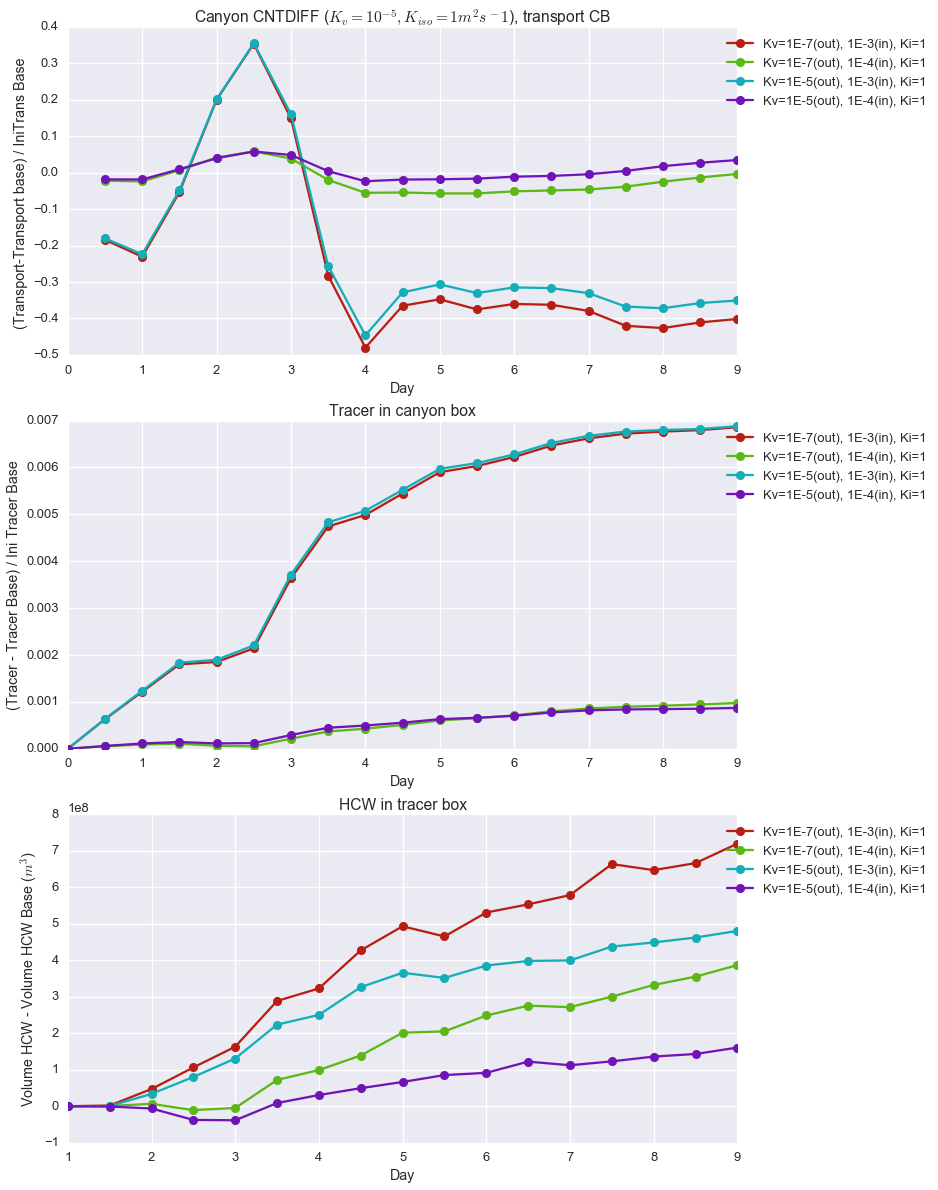

In [18]:
sns.set_palette( sns.hls_palette(4, l=.4, s=.8)) 

fig45=plt.figure(figsize=(12,20))

total4 =  + AS1[:,4] - AS2[:,4] - CS3[:,4] + CS3sb[:,4]+LID1[:,4] + LID2[:,4]
total0 =  + AS1[:,0] - AS2[:,0] - CS3[:,0] + CS3sb[:,0]+LID1[:,0] + LID2[:,0]
total1 =  + AS1[:,1] - AS2[:,1] - CS3[:,1] + CS3sb[:,1]+LID1[:,1] + LID2[:,1]
total2 =  + AS1[:,2] - AS2[:,2] - CS3[:,2] + CS3sb[:,2]+LID1[:,2] + LID2[:,2]
total3 =  + AS1[:,3] - AS2[:,3] - CS3[:,3] + CS3sb[:,3]+LID1[:,3] + LID2[:,3]

ax1 = plt.subplot(3,1,1)
#ax1.plot(times[1:]/2.0, LID1[:,4]+LID2[:,4],'o-', label = 'LID1+LID2')
#ax1.plot(times[1:]/2.0, +AS1[:,4]-AS2[:,4],'o-', label = 'AS1-AS2')
#ax1.plot(times[1:]/2.0, -1000.0*CS3A[0]*CS3[:,4]+1000.0*CS3sbA[[0]*CS3sb[:,4],'o-', label = '-1000.0*CS3A[0]*CS3+1000.0*CS3sbA[[0]*CS3sb')
#ax1.plot(times[1:]/2.0, total1-total/total1[0],'ko-', label = labels[4])
#ax1.plot(times[1:]/2.0, LID1[:,5]+LID2[:,5],'o-', label = 'LID1+LID2')
#ax1.plot(times[1:]/2.0, +AS1[:,5]-AS2[:,5],'o-', label = 'AS1-AS2')
#ax1.plot(times[1:]/2.0, -1000.0*CS3A[0]*CS3[:,5]+1000.0*CS3sbA[[0]*CS3sb[:,5],'o-', label = '-1000.0*CS3A[0]*CS3+1000.0*CS3sbA[[0]*CS3sb')
ax1.plot(times[1:]/2.0, (total0-total4)/total4[0],'o-', label = labels[0])
#ax1.plot(times[1:]/2.0, LID1[:,6]+LID2[:,6],'o-', label = 'LID1+LID2')
#ax1.plot(times[1:]/2.0, +AS1[:,6]-AS2[:,6],'o-', label = 'AS1-AS2')
#ax1.plot(times[1:]/2.0, -1000.0*CS3A[0]*CS3[:,6]+1000.0*CS3sbA[[0]*CS3sb[:,6],'o-', label = '-1000.0*CS3A[0]*CS3+1000.0*CS3sbA[[0]*CS3sb')
ax1.plot(times[1:]/2.0, (total1-total4)/total4[0],'o-', label = labels[1])
ax1.plot(times[1:]/2.0, (total2-total4)/total4[0],'o-', label = labels[2])
ax1.plot(times[1:]/2.0, (total3-total4)/total4[0],'o-', label = labels[3])


plt.legend(loc="upper right", bbox_to_anchor=(1.3,1))
plt.ylabel('(Transport-Transport base) / IniTrans Base ')
plt.xlabel('Day')
plt.title('Canyon CNTDIFF ($K_v=10^{-5}, K_{iso}=1 m^2s^-1$), transport CB')

ax1 = plt.subplot(3,1,2)
ax1.plot(times[0:]/2.0, (TrOnSh[:,0]-TrOnSh[:,4])/TrOnSh[0,4],'o-',label = labels[0])
ax1.plot(times[0:]/2.0, (TrOnSh[:,1]-TrOnSh[:,4])/TrOnSh[0,4],'o-',label = labels[1])
ax1.plot(times[0:]/2.0, (TrOnSh[:,2]-TrOnSh[:,4])/TrOnSh[0,4],'o-',label = labels[2])
ax1.plot(times[0:]/2.0, (TrOnSh[:,3]-TrOnSh[:,4])/TrOnSh[0,4],'o-',label = labels[3])


plt.legend(loc="upper right", bbox_to_anchor=(1.3,1))
plt.ylabel('(Tracer - Tracer Base) / Ini Tracer Base')
plt.xlabel('Day')
plt.title('Tracer in canyon box')

ax1 = plt.subplot(3,1,3)
ax1.plot(times[0:]/2.0, (HWC[:,0]-HWC[:,4]),'o-',label=labels[0])
ax1.plot(times[0:]/2.0, (HWC[:,1]-HWC[:,4]),'o-',label=labels[1])
ax1.plot(times[0:]/2.0, (HWC[:,2]-HWC[:,4]),'o-',label=labels[2])
ax1.plot(times[0:]/2.0, (HWC[:,3]-HWC[:,4]),'o-',label=labels[3])


plt.legend(loc="upper right", bbox_to_anchor=(1.3,1))
plt.ylabel('Volume HCW - Volume HCW Base ($m^3$) ')
plt.xlabel('Day')
plt.title('HCW in tracer box')

#fig45.savefig('results/figures/CStransport/CSTransportCNT_3Tr_difference.eps', format='eps', dpi=1000, bbox_inches='tight')


With increasing $K_v in$:

* More tracer on canyon box (The increase from the base case represents 0.6% in the $K_v_{in}=10^3m^s^{-1}$ case of the initial tracer mass).

* Higher volume of HCW - Less during time dependent phase for $K_v_{in}=10^4m^s^{-1}$, but overall increase over time.


### Checking if it's the geography of mixing or the average diffusivity of that case

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


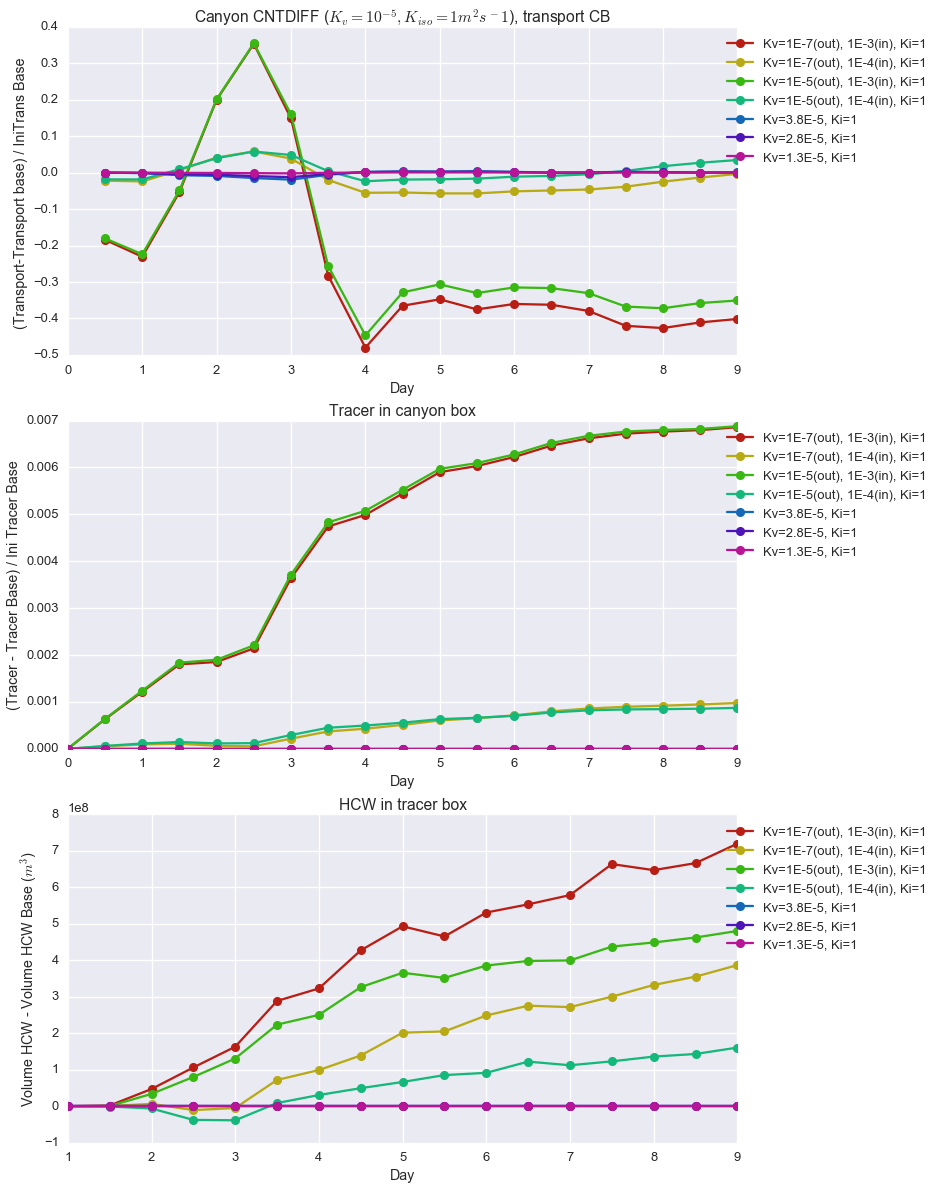

In [19]:
sns.set_palette( sns.hls_palette(7, l=.4, s=.8)) 

fig45=plt.figure(figsize=(12,20))

total4 =  + AS1[:,4] - AS2[:,4] - CS3[:,4] + CS3sb[:,4]+LID1[:,4] + LID2[:,4]
total0 =  + AS1[:,0] - AS2[:,0] - CS3[:,0] + CS3sb[:,0]+LID1[:,0] + LID2[:,0]
total1 =  + AS1[:,1] - AS2[:,1] - CS3[:,1] + CS3sb[:,1]+LID1[:,1] + LID2[:,1]
total2 =  + AS1[:,2] - AS2[:,2] - CS3[:,2] + CS3sb[:,2]+LID1[:,2] + LID2[:,2]
total3 =  + AS1[:,3] - AS2[:,3] - CS3[:,3] + CS3sb[:,3]+LID1[:,3] + LID2[:,3]
total19 =  + AS1[:,19] - AS2[:,19] - CS3[:,19] + CS3sb[:,19]+LID1[:,19] + LID2[:,19]
total20 =  + AS1[:,20] - AS2[:,20] - CS3[:,20] + CS3sb[:,20]+LID1[:,20] + LID2[:,20]
total21 =  + AS1[:,21] - AS2[:,21] - CS3[:,21] + CS3sb[:,21]+LID1[:,21] + LID2[:,21]

ax1 = plt.subplot(3,1,1)
#ax1.plot(times[1:]/2.0, LID1[:,4]+LID2[:,4],'o-', label = 'LID1+LID2')
#ax1.plot(times[1:]/2.0, +AS1[:,4]-AS2[:,4],'o-', label = 'AS1-AS2')
#ax1.plot(times[1:]/2.0, -1000.0*CS3A[0]*CS3[:,4]+1000.0*CS3sbA[[0]*CS3sb[:,4],'o-', label = '-1000.0*CS3A[0]*CS3+1000.0*CS3sbA[[0]*CS3sb')
#ax1.plot(times[1:]/2.0, total1-total/total1[0],'ko-', label = labels[4])
#ax1.plot(times[1:]/2.0, LID1[:,5]+LID2[:,5],'o-', label = 'LID1+LID2')
#ax1.plot(times[1:]/2.0, +AS1[:,5]-AS2[:,5],'o-', label = 'AS1-AS2')
#ax1.plot(times[1:]/2.0, -1000.0*CS3A[0]*CS3[:,5]+1000.0*CS3sbA[[0]*CS3sb[:,5],'o-', label = '-1000.0*CS3A[0]*CS3+1000.0*CS3sbA[[0]*CS3sb')
ax1.plot(times[1:]/2.0, (total0-total4)/total4[0],'o-', label = labels[0])
#ax1.plot(times[1:]/2.0, LID1[:,6]+LID2[:,6],'o-', label = 'LID1+LID2')
#ax1.plot(times[1:]/2.0, +AS1[:,6]-AS2[:,6],'o-', label = 'AS1-AS2')
#ax1.plot(times[1:]/2.0, -1000.0*CS3A[0]*CS3[:,6]+1000.0*CS3sbA[[0]*CS3sb[:,6],'o-', label = '-1000.0*CS3A[0]*CS3+1000.0*CS3sbA[[0]*CS3sb')
ax1.plot(times[1:]/2.0, (total1-total4)/total4[0],'o-', label = labels[1])
ax1.plot(times[1:]/2.0, (total2-total4)/total4[0],'o-', label = labels[2])
ax1.plot(times[1:]/2.0, (total3-total4)/total4[0],'o-', label = labels[3])
ax1.plot(times[1:]/2.0, (total19-total4)/total4[0],'o-', label = labels[19])
ax1.plot(times[1:]/2.0, (total20-total4)/total4[0],'o-', label = labels[20])
ax1.plot(times[1:]/2.0, (total21-total4)/total4[0],'o-', label = labels[21])


plt.legend(loc="upper right", bbox_to_anchor=(1.3,1))
plt.ylabel('(Transport-Transport base) / IniTrans Base ')
plt.xlabel('Day')
plt.title('Canyon CNTDIFF ($K_v=10^{-5}, K_{iso}=1 m^2s^-1$), transport CB')

ax1 = plt.subplot(3,1,2)
ax1.plot(times[0:]/2.0, (TrOnSh[:,0]-TrOnSh[:,4])/TrOnSh[0,4],'o-',label = labels[0])
ax1.plot(times[0:]/2.0, (TrOnSh[:,1]-TrOnSh[:,4])/TrOnSh[0,4],'o-',label = labels[1])
ax1.plot(times[0:]/2.0, (TrOnSh[:,2]-TrOnSh[:,4])/TrOnSh[0,4],'o-',label = labels[2])
ax1.plot(times[0:]/2.0, (TrOnSh[:,3]-TrOnSh[:,4])/TrOnSh[0,4],'o-',label = labels[3])
ax1.plot(times[0:]/2.0, (TrOnSh[:,19]-TrOnSh[:,19])/TrOnSh[0,4],'o-',label = labels[19])
ax1.plot(times[0:]/2.0, (TrOnSh[:,20]-TrOnSh[:,20])/TrOnSh[0,4],'o-',label = labels[20])
ax1.plot(times[0:]/2.0, (TrOnSh[:,21]-TrOnSh[:,21])/TrOnSh[0,4],'o-',label = labels[21])


plt.legend(loc="upper right", bbox_to_anchor=(1.3,1))
plt.ylabel('(Tracer - Tracer Base) / Ini Tracer Base')
plt.xlabel('Day')
plt.title('Tracer in canyon box')

ax1 = plt.subplot(3,1,3)
ax1.plot(times[0:]/2.0, (HWC[:,0]-HWC[:,4]),'o-',label=labels[0])
ax1.plot(times[0:]/2.0, (HWC[:,1]-HWC[:,4]),'o-',label=labels[1])
ax1.plot(times[0:]/2.0, (HWC[:,2]-HWC[:,4]),'o-',label=labels[2])
ax1.plot(times[0:]/2.0, (HWC[:,3]-HWC[:,4]),'o-',label=labels[3])
ax1.plot(times[0:]/2.0, (HWC[:,19]-HWC[:,19]),'o-',label=labels[19])
ax1.plot(times[0:]/2.0, (HWC[:,20]-HWC[:,20]),'o-',label=labels[20])
ax1.plot(times[0:]/2.0, (HWC[:,21]-HWC[:,21]),'o-',label=labels[21])


plt.legend(loc="upper right", bbox_to_anchor=(1.3,1))
plt.ylabel('Volume HCW - Volume HCW Base ($m^3$) ')
plt.xlabel('Day')
plt.title('HCW in tracer box')

#fig45.savefig('results/figures/CStransport/CSTransportCNT_3Tr_difference.eps', format='eps', dpi=1000, bbox_inches='tight')


## Non-dimensional numbers

In [67]:
Peh = np.zeros(19) # 13 tracers
Pev = np.zeros(19) # 13 tracers
K = np.zeros(19)

#kd = np.array([1.E-4,1.E-3,1.E-2,1.E-1,
#               1.E-5,1.E-4,1.E-3,(3.81)*1.E-5,(2.8)*1.E-5,(1.3)*1.E-5,1.E-5,1.E-4,1.E-3,1.E-5,1.E-4,1.E-3,
#               1.E-5,1.E-4,1.E-3,(3.81)*1.E-5,(2.8)*1.E-5,(1.3)*1.E-5])

#kd = np.array([np.mean([1.E-3,1E-7]),np.mean([1.E-4,1E-7]),np.mean([1.E-3,1E-5]),np.mean([1.E-5,1E-4]),
#               1.E-5,1.E-4,1.E-3,(3.81)*1.E-5,(2.8)*1.E-5,(1.3)*1.E-5,1.E-5,1.E-4,1.E-3,1.E-5,1.E-4,1.E-3,
#               1.E-5,1.E-4,1.E-3,(3.81)*1.E-5,(2.8)*1.E-5,(1.3)*1.E-5])

kdout = np.array([1.E-7,1.E-7,1.E-5,1.E-5,
               1.E-5,1.E-4,1.E-3,(3.81)*1.E-5,(2.8)*1.E-5,(1.3)*1.E-5,1.E-5,1.E-4,1.E-3,1.E-5,1.E-4,1.E-3,
               1.E-5,1.E-4,1.E-3,(3.81)*1.E-5,(2.8)*1.E-5,(1.3)*1.E-5])

kdcan = np.array([1.E-3,1.E-4,1.E-3,1.E-4,
               1.E-5,1.E-4,1.E-3,(3.81)*1.E-5,(2.8)*1.E-5,(1.3)*1.E-5,1.E-5,1.E-4,1.E-3,1.E-5,1.E-4,1.E-3,
               1.E-5,1.E-4,1.E-3,(3.81)*1.E-5,(2.8)*1.E-5,(1.3)*1.E-5])

ki = np.array([1.0,1.0,1.0,1.0,1.0,1.0,1.0,10.0,10.0,10.0,1.0,1.0,1.0,10.0,10.0,10.0,0.1,0.1,0.1,1.0,1.0,1.0])

Z = np.array([72.0,84.0,76.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,85.0,
              85.0,85.0])
U = np.array([0.294,0.410,0.328,0.410,0.410,0.410,0.410,0.410,0.410,0.410,0.410,0.410,0.410,0.410,0.410,0.410,0.410,
             0.410,0.410,0.410,0.410,0.410])
Om = np.array([0.0033,0.00526,0.0038,0.0055,0.0055,0.0055,0.0055,0.0055,0.0055,0.0055,0.0055,0.0055,0.0055,0.0055,
               0.0055,0.0055,0.0055,0.0055,0.0055,0.0055,0.0055,0.0055])

L = 6400.0 # meters
#U = 0.44#6.60E-2 # ms−1 Barkley - change for mine
#Z = 90.0#21.7 # m Barkley - change for mine
#Om = 0.005 #2.23E-4 # Barkley - change for mine


Peh = (L*U)/ki
Pev_can = (Z*Om)/kdcan
Pev_out = (Z*Om)/kdout

K_out = (Z*Z*ki)/(L*L*kdout)
K_can = (Z*Z*ki)/(L*L*kdcan)

print(Peh)
print(Pev_can)
print(Pev_out)
print(K_out)
print(K_can)

[  1881.6   2624.    2099.2   2624.    2624.    2624.    2624.     262.4
    262.4    262.4   2624.    2624.    2624.     262.4    262.4    262.4
  26240.   26240.   26240.    2624.    2624.    2624. ]
[   237.6          4418.4           288.8          4675.          46750.
   4675.            467.5         12270.34120735  16696.42857143
  35961.53846154  46750.           4675.            467.5         46750.
   4675.            467.5         46750.           4675.            467.5
  12270.34120735  16696.42857143  35961.53846154]
[  2.37600000e+06   4.41840000e+06   2.88800000e+04   4.67500000e+04
   4.67500000e+04   4.67500000e+03   4.67500000e+02   1.22703412e+04
   1.66964286e+04   3.59615385e+04   4.67500000e+04   4.67500000e+03
   4.67500000e+02   4.67500000e+04   4.67500000e+03   4.67500000e+02
   4.67500000e+04   4.67500000e+03   4.67500000e+02   1.22703412e+04
   1.66964286e+04   3.59615385e+04]
[  1.26562500e+03   1.72265625e+03   1.41015625e+01   1.76391602e+01
   1.76391602

In [68]:
TrOnShList = [TrOnSh[:,0], TrOnSh[:,1],TrOnSh[:,2], TrOnSh[:,3], TrOnSh[:,4],TrOnSh[:,5], TrOnSh[:,6]
              ,TrOnSh[:,7],TrOnSh[:,8], TrOnSh[:,9],TrOnSh[:,13], TrOnSh[:,14], TrOnSh[:,15],TrOnSh[:,16],
              TrOnSh[:,17], TrOnSh[:,18],TrOnSh[:,19],TrOnSh[:,20], TrOnSh[:,21]]
HWCList = [HWC[:,0], HWC[:,1],HWC[:,2], HWC[:,3], HWC[:,4],HWC[:,5], HWC[:,6],HWC[:,7],HWC[:,8], HWC[:,9],
           HWC[:,13],HWC[:,14], HWC[:,15],HWC[:,16],HWC[:,17], HWC[:,18],HWC[:,19],HWC[:,20], HWC[:,21]]

vertical1 =LID1A[0]*1000.0*LID1[:,0] + LID2A[0]*1000.0*LID2[:,0] 
total1 =  +1000.0*AS1A[0]*AS1[:,0] -1000.0*AS2A[0]*AS2[:,0]  - 1000.0*CS3A[0]*CS3[:,0] + 1000.0*CS3sbA[0]*CS3sb[:,0] 
vertical2 =LID1A[0]*1000.0*LID1[:,1] + LID2A[0]*1000.0*LID2[:,1] 
total2 = +1000.0*AS1A[0]*AS1[:,1] -1000.0*AS2A[0]*AS2[:,1] - 1000.0*CS3A[0]*CS3[:,1] + 1000.0*CS3sbA[0]*CS3sb[:,1] 
vertical3 =LID1A[0]*1000.0*LID1[:,2] + LID2A[0]*1000.0*LID2[:,2] 
total3 = +1000.0*AS1A[0]*AS1[:,2] -1000.0*AS2A[0]*AS2[:,2] -1000.0*CS3A[0]*CS3[:,2] + 1000.0*CS3sbA[0]*CS3sb[:,2] 
vertical4 =LID1A[0]*1000.0*LID1[:,3] + LID2A[0]*1000.0*LID2[:,3] 
total4 = +1000.0*AS1A[0]*AS1[:,3] -1000.0*AS2A[0]*AS2[:,3]-1000.0*CS3A[0]*CS3[:,3] + 1000.0*CS3sbA[0]*CS3sb[:,3] 
vertical5 =LID1A[0]*1000.0*LID1[:,4] + LID2A[0]*1000.0*LID2[:,4] 
total5 =  +1000.0*AS1A[0]*AS1[:,4] -1000.0*AS2A[0]*AS2[:,4] - 1000.0*CS3A[0]*CS3[:,4] + 1000.0*CS3sbA[0]*CS3sb[:,4] 
vertical6 =LID1A[0]*1000.0*LID1[:,5] + LID2A[0]*1000.0*LID2[:,5] 
total6 = +1000.0*AS1A[0]*AS1[:,5] -1000.0*AS2A[0]*AS2[:,5] - 1000.0*CS3A[0]*CS3[:,5] + 1000.0*CS3sbA[0]*CS3sb[:,5] 
vertical7 =LID1A[0]*1000.0*LID1[:,6] + LID2A[0]*1000.0*LID2[:,6] 
total7 = +1000.0*AS1A[0]*AS1[:,6] -1000.0*AS2A[0]*AS2[:,6]-1000.0*CS3A[0]*CS3[:,6] + 1000.0*CS3sbA[0]*CS3sb[:,6] 
vertical8 =LID1A[0]*1000.0*LID1[:,7] + LID2A[0]*1000.0*LID2[:,7] 
total8 = +1000.0*AS1A[0]*AS1[:,7] -1000.0*AS2A[0]*AS2[:,7] -1000.0*CS3A[0]*CS3[:,7] + 1000.0*CS3sbA[0]*CS3sb[:,7] 
vertical9 =LID1A[0]*1000.0*LID1[:,8] + LID2A[0]*1000.0*LID2[:,8] 
total9 = +1000.0*AS1A[0]*AS1[:,8] -1000.0*AS2A[0]*AS2[:,8] -1000.0*CS3A[0]*CS3[:,8] + 1000.0*CS3sbA[0]*CS3sb[:,8] 
vertical10 =LID1A[0]*1000.0*LID1[:,9] + LID2A[0]*1000.0*LID2[:,9] 
total10 = +1000.0*AS1A[0]*AS1[:,9] -1000.0*AS2A[0]*AS2[:,9] - 1000.0*CS3A[0]*CS3[:,9] + 1000.0*CS3sbA[0]*CS3sb[:,9] 
vertical11 =LID1A[0]*1000.0*LID1[:,10] + LID2A[0]*1000.0*LID2[:,10] 
total11 = +1000.0*AS1A[0]*AS1[:,10] -1000.0*AS2A[0]*AS2[:,10] - 1000.0*CS3A[0]*CS3[:,10] + 1000.0*CS3sbA[0]*CS3sb[:,10] 
vertical2 =LID1A[0]*1000.0*LID1[:,11] + LID2A[0]*1000.0*LID2[:,11] 
total12 = +1000.0*AS1A[0]*AS1[:,11] -1000.0*AS2A[0]*AS2[:,11]- 1000.0*CS3A[0]*CS3[:,11] + 1000.0*CS3sbA[0]*CS3sb[:,11] 
vertical13 =LID1A[0]*1000.0*LID1[:,12] + LID2A[0]*1000.0*LID2[:,12] 
total13 = +1000.0*AS1A[0]*AS1[:,12] -1000.0*AS2A[0]*AS2[:,12] -1000.0*CS3A[0]*CS3[:,12] + 1000.0*CS3sbA[0]*CS3sb[:,12] 
vertical14 =LID1A[0]*1000.0*LID1[:,13] + LID2A[0]*1000.0*LID2[:,13] 
total14 = +1000.0*AS1A[0]*AS1[:,13] -1000.0*AS2A[0]*AS2[:,13] - 1000.0*CS3A[0]*CS3[:,13] + 1000.0*CS3sbA[0]*CS3sb[:,13] 
vertical15 =LID1A[0]*1000.0*LID1[:,14] + LID2A[0]*1000.0*LID2[:,14] 
total15 = +1000.0*AS1A[0]*AS1[:,14] -1000.0*AS2A[0]*AS2[:,14]- 1000.0*CS3A[0]*CS3[:,14] + 1000.0*CS3sbA[0]*CS3sb[:,14] 
vertical16 =LID1A[0]*1000.0*LID1[:,15] + LID2A[0]*1000.0*LID2[:,15] 
total16 = +1000.0*AS1A[0]*AS1[:,15] -1000.0*AS2A[0]*AS2[:,15] - 1000.0*CS3A[0]*CS3[:,15] + 1000.0*CS3sbA[0]*CS3sb[:,15] 
vertical17 =LID1A[0]*1000.0*LID1[:,16] + LID2A[0]*1000.0*LID2[:,16] 
total17 = +1000.0*AS1A[0]*AS1[:,16] -1000.0*AS2A[0]*AS2[:,16]- 1000.0*CS3A[0]*CS3[:,16] + 1000.0*CS3sbA[0]*CS3sb[:,16] 
vertical18 =LID1A[0]*1000.0*LID1[:,17] + LID2A[0]*1000.0*LID2[:,17] 
total18 = +1000.0*AS1A[0]*AS1[:,17] -1000.0*AS2A[0]*AS2[:,17]- 1000.0*CS3A[0]*CS3[:,17] + 1000.0*CS3sbA[0]*CS3sb[:,17] 
vertical19 =LID1A[0]*1000.0*LID1[:,18] + LID2A[0]*1000.0*LID2[:,18] 
total19 = +1000.0*AS1A[0]*AS1[:,18] -1000.0*AS2A[0]*AS2[:,18] - 1000.0*CS3A[0]*CS3[:,18] + 1000.0*CS3sbA[0]*CS3sb[:,18] 
vertical20 =LID1A[0]*1000.0*LID1[:,19] + LID2A[0]*1000.0*LID2[:,19] 
total20 = +1000.0*AS1A[0]*AS1[:,19] -1000.0*AS2A[0]*AS2[:,19] - 1000.0*CS3A[0]*CS3[:,19] + 1000.0*CS3sbA[0]*CS3sb[:,19] 
vertical21 =LID1A[0]*1000.0*LID1[:,20] + LID2A[0]*1000.0*LID2[:,20] 
total21 = +1000.0*AS1A[0]*AS1[:,20] -1000.0*AS2A[0]*AS2[:,20] - 1000.0*CS3A[0]*CS3[:,20] + 1000.0*CS3sbA[0]*CS3sb[:,20] 
vertical22 =LID1A[0]*1000.0*LID1[:,21] + LID2A[0]*1000.0*LID2[:,21] 
total22 = +1000.0*AS1A[0]*AS1[:,21] -1000.0*AS2A[0]*AS2[:,21]- 1000.0*CS3A[0]*CS3[:,21] + 1000.0*CS3sbA[0]*CS3sb[:,21] 

totalList = [total1,total2, total3,total4, total5,total6, total7,total8,total9, total10,total14,
             total15,total16,total17,total18,total19,total20,total21,total22]#,total11, total12, total13]
verticalList = [vertical1,vertical2, vertical3, vertical4,vertical5,vertical6, vertical7,vertical8,
                vertical9, vertical10,vertical14, vertical15, vertical16,vertical17, vertical18, vertical19,vertical20,
               vertical21,vertical22]#,vertical11, vertical12, vertical13]



In [69]:
watVert0 = LID1A[0]*1000.0*wLID1[:,0] + LID2A[0]*1000.0*wLID2[:,0] 
watTot0 =  +1000.0*AS1A[0]*wAS1[:,0] -1000.0*AS2A[0]*wAS2[:,0]  - 1000.0*CS3A[0]*wCS3[:,0] + 1000.0*CS3sbA[0]*wCS3sb[:,0] 
watVert1 = LID1A[0]*1000.0*wLID1[:,1] + LID2A[0]*1000.0*wLID2[:,1] 
watTot1 =  +1000.0*AS1A[0]*wAS1[:,1] -1000.0*AS2A[0]*wAS2[:,1]  - 1000.0*CS3A[0]*wCS3[:,1] + 1000.0*CS3sbA[0]*wCS3sb[:,1] 
watVert2 = LID1A[0]*1000.0*wLID1[:,2] + LID2A[0]*1000.0*wLID2[:,2] 
watTot2 =  +1000.0*AS1A[0]*wAS1[:,2] -1000.0*AS2A[0]*wAS2[:,2]  - 1000.0*CS3A[0]*wCS3[:,2] + 1000.0*CS3sbA[0]*wCS3sb[:,2] 
watVert3 = LID1A[0]*1000.0*wLID1[:,3] + LID2A[0]*1000.0*wLID2[:,3] 
watTot3 =  +1000.0*AS1A[0]*wAS1[:,3] -1000.0*AS2A[0]*wAS2[:,3]  - 1000.0*CS3A[0]*wCS3[:,3] + 1000.0*CS3sbA[0]*wCS3sb[:,3] 
watVert4 = LID1A[0]*1000.0*wLID1[:,4] + LID2A[0]*1000.0*wLID2[:,4] 
watTot4 =  +1000.0*AS1A[0]*wAS1[:,4] -1000.0*AS2A[0]*wAS2[:,4]  - 1000.0*CS3A[0]*wCS3[:,4] + 1000.0*CS3sbA[0]*wCS3sb[:,4] 
watVert5 = LID1A[0]*1000.0*wLID1[:,5] + LID2A[0]*1000.0*wLID2[:,5] 
watTot5 =  +1000.0*AS1A[0]*wAS1[:,5] -1000.0*AS2A[0]*wAS2[:,5]  - 1000.0*CS3A[0]*wCS3[:,5] + 1000.0*CS3sbA[0]*wCS3sb[:,5] 
watVert6 = LID1A[0]*1000.0*wLID1[:,6] + LID2A[0]*1000.0*wLID2[:,6] 
watTot6 =  +1000.0*AS1A[0]*wAS1[:,6] -1000.0*AS2A[0]*wAS2[:,6]  - 1000.0*CS3A[0]*wCS3[:,6] + 1000.0*CS3sbA[0]*wCS3sb[:,6] 
watVert7 = LID1A[0]*1000.0*wLID1[:,7] + LID2A[0]*1000.0*wLID2[:,7] 
watTot7 =  +1000.0*AS1A[0]*wAS1[:,7] -1000.0*AS2A[0]*wAS2[:,7]  - 1000.0*CS3A[0]*wCS3[:,7] + 1000.0*CS3sbA[0]*wCS3sb[:,7] 
watVert8 = LID1A[0]*1000.0*wLID1[:,8] + LID2A[0]*1000.0*wLID2[:,8] 
watTot8 =  +1000.0*AS1A[0]*wAS1[:,8] -1000.0*AS2A[0]*wAS2[:,8]  - 1000.0*CS3A[0]*wCS3[:,8] + 1000.0*CS3sbA[0]*wCS3sb[:,8] 
watVert9 = LID1A[0]*1000.0*wLID1[:,9] + LID2A[0]*1000.0*wLID2[:,9] 
watTot9 =  +1000.0*AS1A[0]*wAS1[:,9] -1000.0*AS2A[0]*wAS2[:,9]  - 1000.0*CS3A[0]*wCS3[:,9] + 1000.0*CS3sbA[0]*wCS3sb[:,9] 

watTotList = [watTot0,watTot1,watTot2,watTot3,watTot4,watTot5,watTot6,watTot8,watTot9 ]
watVertList = [watVert0,watVert2,watVert4,watVert5,watVert6,watVert8,watVert9 ]


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


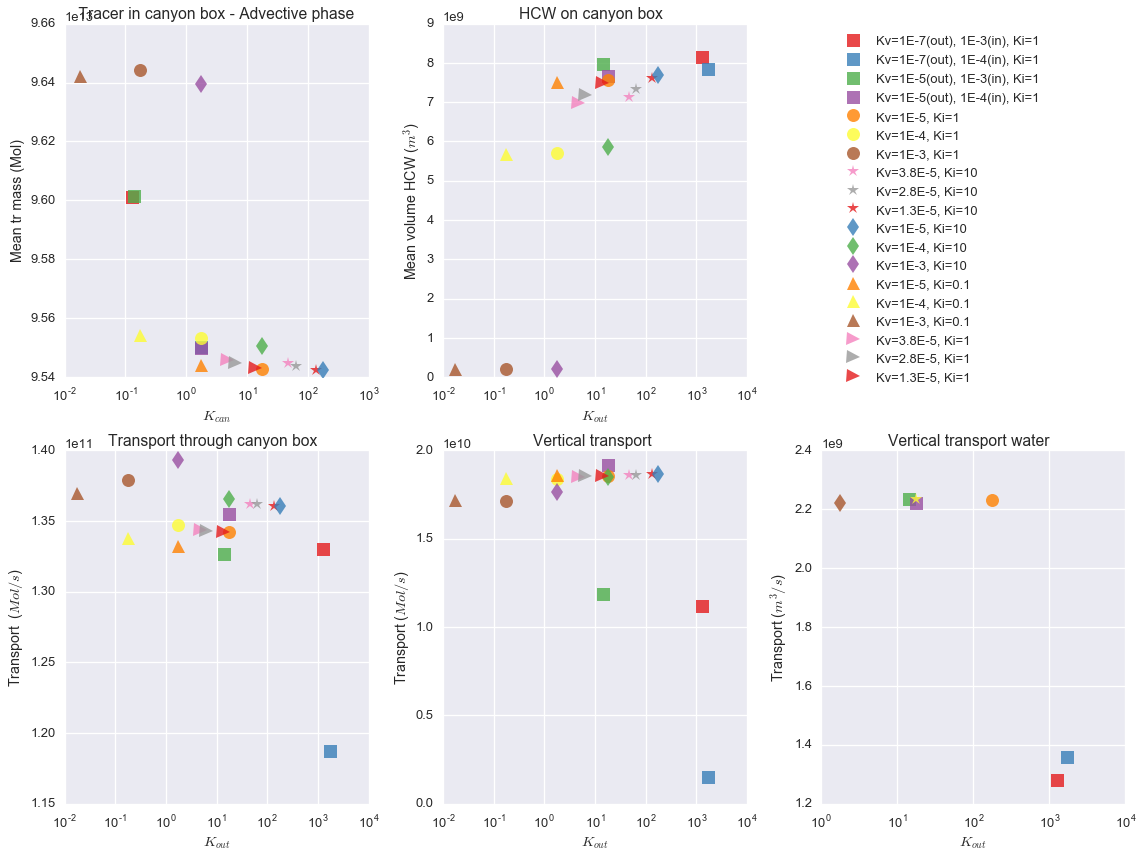

In [74]:
sns.set_palette( 'Set1',9)
fig42=plt.figure(figsize=(16,12))

marker = ['s','s','s','s','o','o','o','*','*','*','d','d','d','^','^','^','>','>','>']
wmarker = ['s','s','s','s','o','*','d','.','^','>']

jj=0

indexList = [0,1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21]
windexList = [0,1,2,3,4,5,6,8,9]
transEqIndex = [0,1,2,3,13,4,16,10,7,19]
    
# ADVECTIVE PHASE ONLY - TIME INTEGRATED CROSS-SHELF TRANSPORT
for ii,tr,wat,trans,vert in zip(indexList, TrOnShList,HWCList,totalList,verticalList):
    
    ax1 = plt.subplot(2,3,1)
    plt.plot( K_can[ii] ,np.mean(tr[10:]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean tr mass (Mol)')
    plt.xlabel('$K_{can}$')
    plt.title(' Tracer in canyon box - Advective phase ')
    ax1.set_xscale("log", nonposy='clip')
    
    ax2 = plt.subplot(2,3,2)
    plt.plot(K_out[ii] , np.nanmean(wat[10:]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean volume HCW ($m^3$)')
    plt.xlabel('$K_{out}$')
    plt.title('HCW on canyon box  ')
    ax2.set_xscale("log", nonposy='clip')
    

    ax3 = plt.subplot(2,3,4)
    plt.plot(K_out[ii] , np.nanmean((trans[10:]+vert[10:])),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Transport  ($Mol/s$)')
    plt.xlabel('$K_{out}$')
    plt.title('Transport through canyon box  ')
    ax3.set_xscale("log", nonposy='clip')
    
    
    ax4 = plt.subplot(2,3,5)
    plt.plot(K_out[ii] , np.nanmean(vert[10:]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Transport ($Mol/s$)')
    plt.xlabel('$K_{out}$')
    plt.title('Vertical transport ')
    ax4.set_xscale("log", nonposy='clip')
    
    jj = jj+1

for mm, ii, wat in zip(transEqIndex,windexList, watVertList):
     
    ax5 = plt.subplot(2,3,6)
    plt.plot(K_out[mm] , np.nanmean(wat[10:]),wmarker[ii], markersize = 13,alpha = 0.8,label = wlabels[ii])
    plt.ylabel('Transport ($m^3/s$)')
    plt.xlabel('$K_{out}$')
    plt.title('Vertical transport water  ')
    ax5.set_xscale("log", nonposy='clip')
    
    
ax2.legend(loc ='upper right', bbox_to_anchor=(2,1))
plt.tight_layout()
#ax2.legend(loc =0)

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


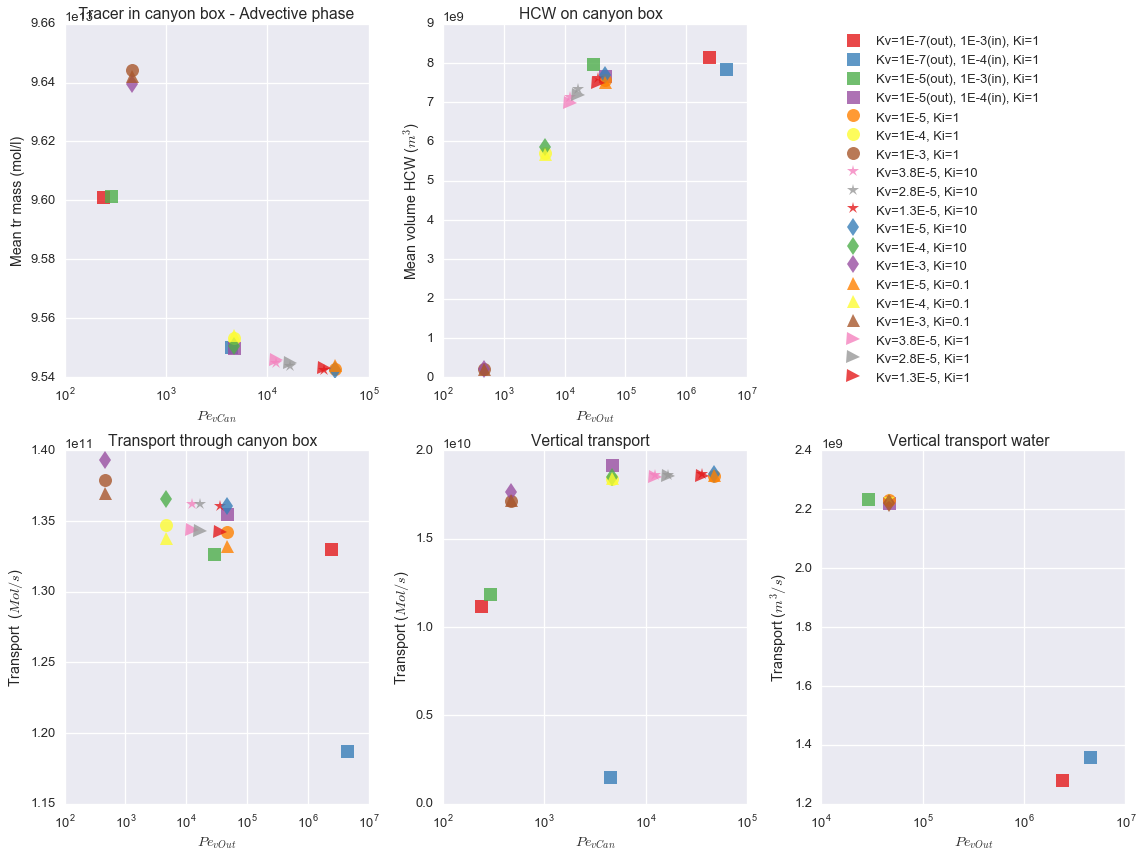

In [87]:
sns.set_palette( 'Set1',9)
fig42=plt.figure(figsize=(16,12))

marker = ['s','s','s','s','o','o','o','*','*','*','d','d','d','^','^','^','>','>','>']
jj=0

indexList = [0,1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21]

    
# ADVECTIVE PHASE ONLY - TIME INTEGRATED CROSS-SHELF TRANSPORT
for ii,tr,wat,trans,vert in zip(indexList, TrOnShList,HWCList,totalList,verticalList):
    ax1 = plt.subplot(2,3,1)
    plt.plot( Pev_can[ii] ,np.mean(tr[10:]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean tr mass (mol/l)')
    plt.xlabel('$Pe_{vCan}$')
    plt.title(' Tracer in canyon box - Advective phase ')
    ax1.set_xscale("log", nonposy='clip')
    
    ax2 = plt.subplot(2,3,2)
    plt.plot(Pev_out[ii] , np.nanmean(wat[10:]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean volume HCW ($m^3$)')
    plt.xlabel('$Pe_{vOut}$')
    plt.title('HCW on canyon box  ')
    ax2.set_xscale("log", nonposy='clip')
    

    ax3 = plt.subplot(2,3,4)
    plt.plot(Pev_out[ii] , np.nanmean((trans[10:]+vert[10:])),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Transport  ($Mol/s$)')
    plt.xlabel('$Pe_{vOut}$')
    plt.title('Transport through canyon box  ')
    ax3.set_xscale("log", nonposy='clip')
    
    
    ax4 = plt.subplot(2,3,5)
    plt.plot(Pev_can[ii] , np.nanmean(vert[10:]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Transport ($Mol/s$)')
    plt.xlabel('$Pe_{vCan}$')
    plt.title('Vertical transport  ')
    ax4.set_xscale("log", nonposy='clip')
    jj = jj+1

for mm, ii, wat in zip(transEqIndex,windexList, watVertList):
     
    ax5 = plt.subplot(2,3,6)
    
    plt.plot(Pev_out[mm] , np.nanmean(wat[10:]),wmarker[ii], markersize = 13,alpha = 0.8,label = wlabels[ii])
    plt.ylabel('Transport ($m^3/s$)')
    plt.xlabel('$Pe_{vOut}$')
    plt.title('Vertical transport water  ')
    ax5.set_xscale("log", nonposy='clip')

plt.tight_layout()
ax2.legend(loc ='upper right', bbox_to_anchor=(2,1))
#ax2.legend(loc =0)

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


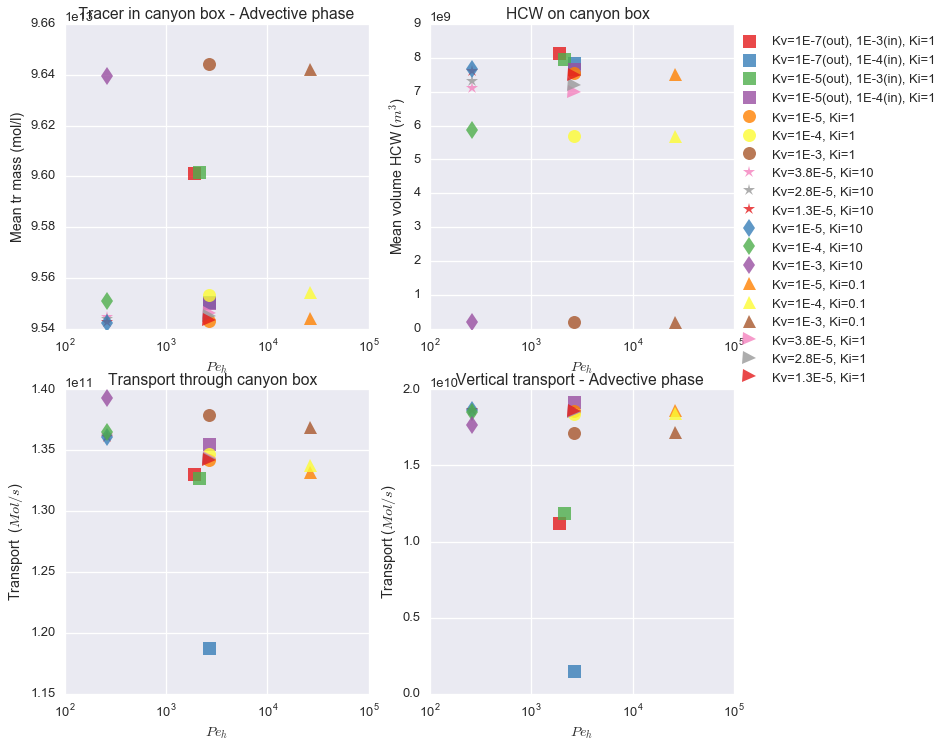

In [79]:
sns.set_palette( 'Set1',9)
fig42=plt.figure(figsize=(12,12))

marker = ['s','s','s','s','o','o','o','*','*','*','d','d','d','^','^','^','>','>','>']
jj=0

indexList = [0,1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21]

    
# ADVECTIVE PHASE ONLY - TIME INTEGRATED CROSS-SHELF TRANSPORT
for ii,tr,wat,trans,vert in zip(indexList, TrOnShList,HWCList,totalList,verticalList):
    ax1 = plt.subplot(2,2,1)
    plt.plot( Peh[ii] ,np.mean(tr[10:]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean tr mass (mol/l)')
    plt.xlabel('$Pe_h$')
    plt.title(' Tracer in canyon box - Advective phase ')
    ax1.set_xscale("log", nonposy='clip')
    
    ax2 = plt.subplot(2,2,2)
    plt.plot(Peh[ii] , np.nanmean(wat[10:]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Mean volume HCW ($m^3$)')
    plt.xlabel('$Pe_h$')
    plt.title('HCW on canyon box  ')
    ax2.set_xscale("log", nonposy='clip')
    

    ax3 = plt.subplot(2,2,3)
    plt.plot(Peh[ii] , np.nanmean((trans[10:]+vert[10:])),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Transport  ($Mol/s$)')
    plt.xlabel('$Pe_h$')
    plt.title('Transport through canyon box  ')
    ax3.set_xscale("log", nonposy='clip')
    
    
    ax4 = plt.subplot(2,2,4)
    plt.plot(Peh[ii] , np.nanmean(vert[10:]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Transport ($Mol/s$)')
    plt.xlabel('$Pe_h$')
    plt.title('Vertical transport - Advective phase ')
    ax4.set_xscale("log", nonposy='clip')
    jj = jj+1


ax2.legend(loc ='upper right', bbox_to_anchor=(1.7,1))
#ax2.legend(loc =0)

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


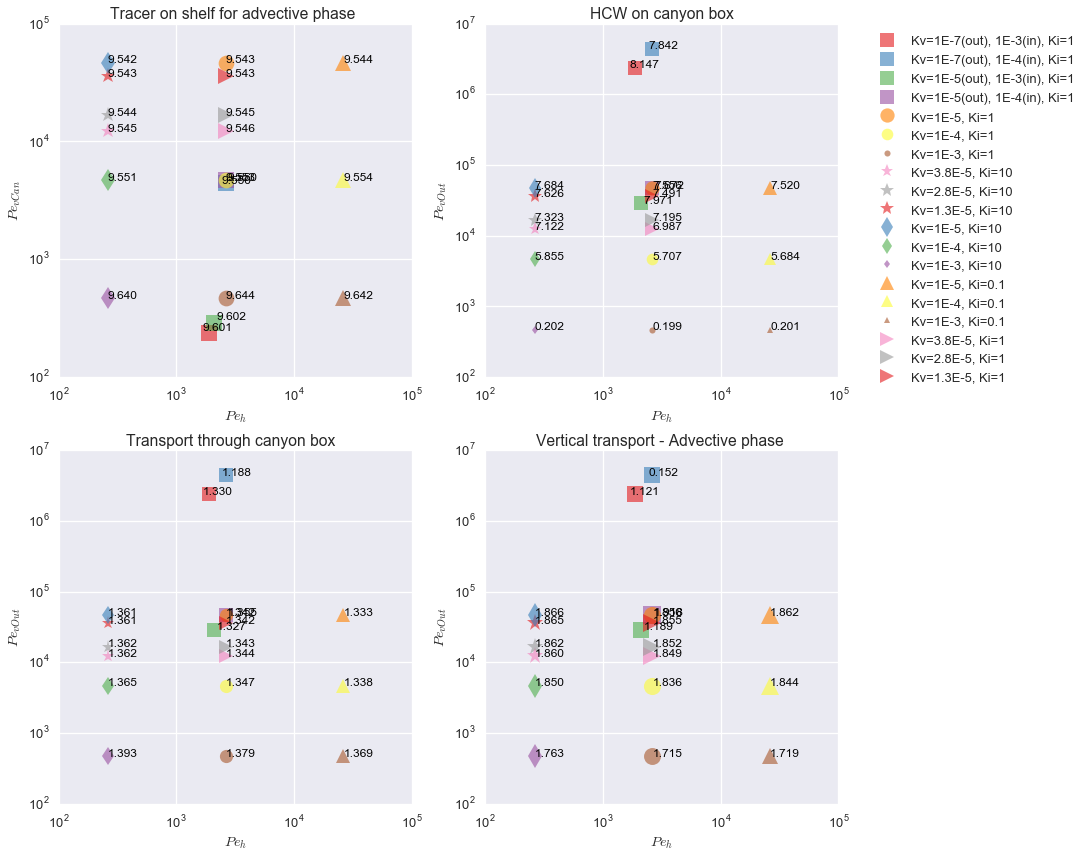

In [83]:
sns.set_palette( 'Set1',9)
fig42=plt.figure(figsize=(12,12))

marker = ['s','s','s','s','o','o','o','*','*','*','d','d','d','^','^','^','>','>','>']
jj=0

indexList = [0,1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21]

    
# ADVECTIVE PHASE ONLY - TIME INTEGRATED CROSS-SHELF TRANSPORT
for ii,tr,wat,trans,vert in zip(indexList, TrOnShList,HWCList,totalList,verticalList):
    
    ax1 = plt.subplot(2,2,1)
    msize = (tr[18]/1.E13)+6
    plt.plot(Peh[ii] , Pev_can[ii],marker[jj],markersize = msize , label = labels[ii],alpha = 0.6)
    strnum = ('%1.3f' %(np.mean(tr[10:]/1.E13)))
    if ii == 3:
        pl.text(Peh[ii]+100, Pev_can[ii]+10, strnum, color="black", fontsize=12)
    elif ii == 2:
        pl.text(Peh[ii]+100, Pev_can[ii]+20, strnum, color="black", fontsize=12)
    elif ii == 0:
        pl.text(Peh[ii]-200, Pev_can[ii]+10, strnum, color="black", fontsize=12)
    elif ii == 1:
        pl.text(Peh[ii]-200, Pev_can[ii]+20, strnum, color="black", fontsize=12)
    else:
        pl.text(Peh[ii], Pev_can[ii], strnum, color="black", fontsize=12)

    plt.ylabel('$Pe_{vCan}$')
    plt.xlabel('$Pe_h$')
    plt.title('Tracer on shelf for advective phase ')
    ax1.set_xscale("log", nonposy='clip')
    ax1.set_yscale("log", nonposy='clip')
    
    ax2 = plt.subplot(2,2,2)
    msize = (wat[18]/1.E9)+6
    plt.plot(Peh[ii] , Pev_out[ii],marker[jj],markersize = msize , label = labels[ii],alpha = 0.6)
    strnum = ('%1.3f' %(np.nanmean(wat[10:]/1.E9)))
    if ii == 3:
        pl.text(Peh[ii]+100, Pev_out[ii]+10, strnum, color="black", fontsize=12)
    elif ii == 2:
        pl.text(Peh[ii]+100, Pev_out[ii]+20, strnum, color="black", fontsize=12)
    elif ii == 0:
        pl.text(Peh[ii]-200, Pev_out[ii]+10, strnum, color="black", fontsize=12)
    elif ii == 1:
        pl.text(Peh[ii]-200, Pev_out[ii]+20, strnum, color="black", fontsize=12)
    else:
        pl.text(Peh[ii], Pev_out[ii], strnum, color="black", fontsize=12)
    plt.ylabel('$Pe_{vOut}}$')
    plt.xlabel('$Pe_h$')
    plt.title('HCW on canyon box')
    ax2.set_xscale("log", nonposy='clip')
    ax2.set_yscale("log", nonposy='clip')
    

    ax3 = plt.subplot(2,2,3)
    msize = (trans[17]/1.E11)+12
    plt.plot(Peh[ii] , Pev_out[ii],marker[jj],markersize = msize , label = labels[ii],alpha = 0.6)
    strnum = ('%1.3f' %(np.mean((trans[10:]+vert[10:])/1.E11)))
    if ii == 3:
        pl.text(Peh[ii]+100, Pev_out[ii]+10, strnum, color="black", fontsize=12)
    elif ii == 2:
        pl.text(Peh[ii]+100, Pev_out[ii]+20, strnum, color="black", fontsize=12)
    elif ii == 0:
        pl.text(Peh[ii]-200, Pev_out[ii]+10, strnum, color="black", fontsize=12)
    elif ii == 1:
        pl.text(Peh[ii]-200, Pev_out[ii]+20, strnum, color="black", fontsize=12)
    else:
        pl.text(Peh[ii], Pev_out[ii], strnum, color="black", fontsize=12) 
    plt.ylabel('$Pe_{vOut}$')
    plt.xlabel('$Pe_h$')
    plt.title('Transport through canyon box  ')
    ax3.set_xscale("log", nonposy='clip')
    ax3.set_yscale("log", nonposy='clip')
    
    
    ax4 = plt.subplot(2,2,4)
    msize = (vert[17]/1.E10)+15
    plt.plot(Peh[ii] , Pev_out[ii],marker[jj],markersize = msize , label = labels[ii],alpha = 0.6)
    strnum = ('%1.3f' %(np.mean(vert[10:]/1.E10)))
    if ii == 3:
        pl.text(Peh[ii]+100, Pev_out[ii]+10, strnum, color="black", fontsize=12)
    elif ii == 2:
        pl.text(Peh[ii]+100, Pev_out[ii]+20, strnum, color="black", fontsize=12)
    elif ii == 0:
        pl.text(Peh[ii]-200, Pev_out[ii]+10, strnum, color="black", fontsize=12)
    elif ii == 1:
        pl.text(Peh[ii]-200, Pev_out[ii]+20, strnum, color="black", fontsize=12)
    else:
        pl.text(Peh[ii], Pev_out[ii], strnum, color="black", fontsize=12)
    
    plt.ylabel('$Pe_{vOut}$')
    plt.xlabel('$Pe_h$')
    plt.title('Vertical transport - Advective phase ')
    ax4.set_xscale("log", nonposy='clip')
    ax4.set_yscale("log", nonposy='clip')
    
    jj = jj+1

plt.tight_layout()
ax2.legend(loc ='upper right', bbox_to_anchor=(1.7,1))
#ax2.legend(loc =0)

### Time - dependent phase

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


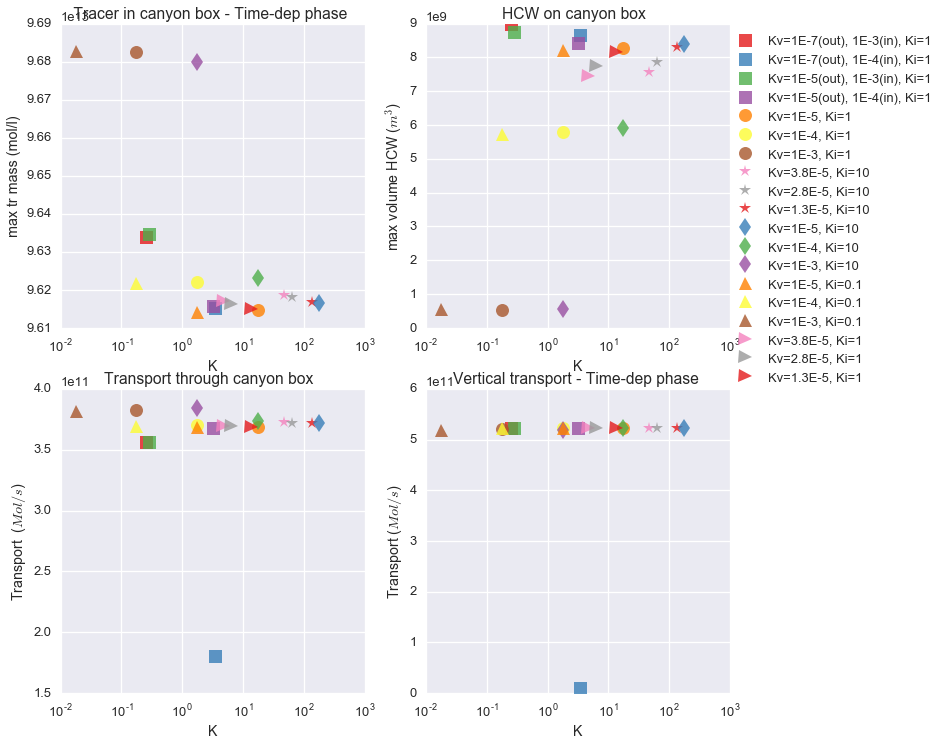

In [56]:
sns.set_palette( 'Set1',9)
fig42=plt.figure(figsize=(12,12))

marker = ['s','s','s','s','o','o','o','*','*','*','d','d','d','^','^','^','>','>','>']
jj=0

indexList = [0,1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21]

    
# TIME INTEGRATED CROSS-SHELF TRANSPORT
for ii,tr,wat,trans,vert in zip(indexList, TrOnShList,HWCList,totalList,verticalList):
    ax1 = plt.subplot(2,2,1)
    plt.plot( K[ii] ,np.max(tr[:10]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('max tr mass (mol/l)')
    plt.xlabel('K')
    plt.title(' Tracer in canyon box - Time-dep phase  ')
    ax1.set_xscale("log", nonposy='clip')
    
    ax2 = plt.subplot(2,2,2)
    plt.plot(K[ii] , np.nanmax(wat[10:]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('max volume HCW ($m^3$)')
    plt.xlabel('K')
    plt.title('HCW on canyon box  ')
    ax2.set_xscale("log", nonposy='clip')
    

    ax3 = plt.subplot(2,2,3)
    plt.plot(K[ii] , np.nanmax((trans[:10]+vert[:10])),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Transport  ($Mol/s$)')
    plt.xlabel('K')
    plt.title('Transport through canyon box  ')
    ax3.set_xscale("log", nonposy='clip')
    
    
    ax4 = plt.subplot(2,2,4)
    plt.plot(K[ii] , np.nanmax(vert[:10]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Transport ($Mol/s$)')
    plt.xlabel('K')
    plt.title('Vertical transport - Time-dep phase ')
    ax4.set_xscale("log", nonposy='clip')
    jj = jj+1


ax2.legend(loc ='upper right', bbox_to_anchor=(1.7,1))
#ax2.legend(loc =0)

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


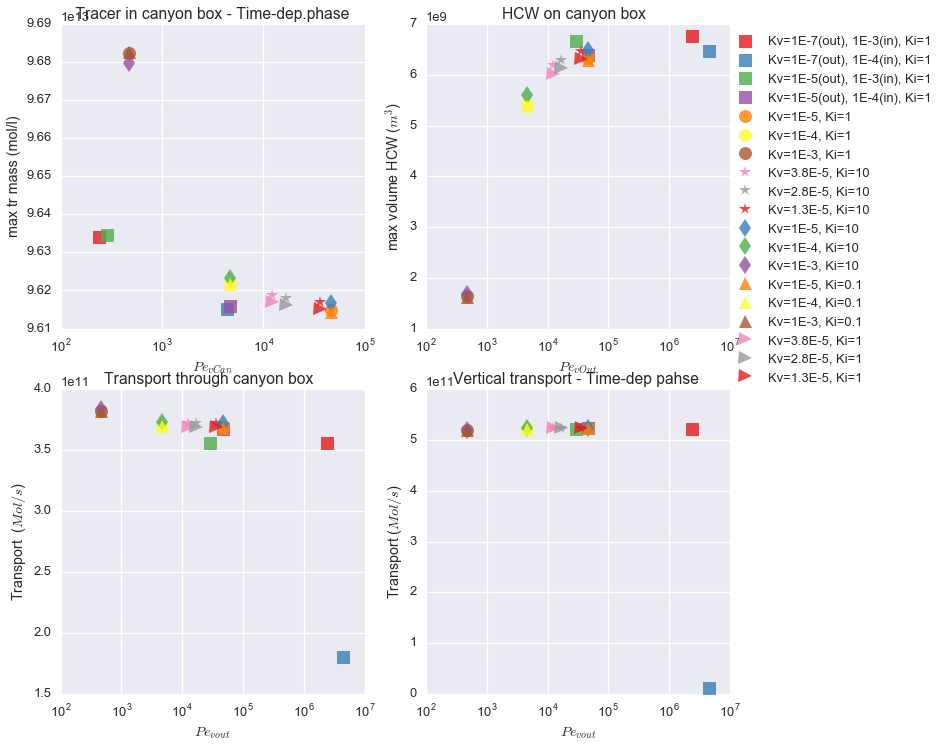

In [84]:
sns.set_palette( 'Set1',9)
fig42=plt.figure(figsize=(12,12))

marker = ['s','s','s','s','o','o','o','*','*','*','d','d','d','^','^','^','>','>','>']
wmarker = ['s','s','s','s','o','*','d','^','>']

jj=0

indexList = [0,1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21]

    
# ADVECTIVE PHASE ONLY - TIME INTEGRATED CROSS-SHELF TRANSPORT
for ii,tr,wat,trans,vert in zip(indexList, TrOnShList,HWCList,totalList,verticalList):
    ax1 = plt.subplot(2,2,1)
    plt.plot( Pev_can[ii] ,np.max(tr[:10]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('max tr mass (mol/l)')
    plt.xlabel('$Pe_{vCan}$')
    plt.title(' Tracer in canyon box - Time-dep.phase ')
    ax1.set_xscale("log", nonposy='clip')
    
    ax2 = plt.subplot(2,2,2)
    plt.plot(Pev_out[ii] , np.nanmax(wat[:10]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('max volume HCW ($m^3$)')
    plt.xlabel('$Pe_{vOut}$')
    plt.title('HCW on canyon box  ')
    ax2.set_xscale("log", nonposy='clip')
    

    ax3 = plt.subplot(2,2,3)
    plt.plot(Pev_out[ii] , np.nanmax((trans[:10]+vert[:10])),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Transport  ($Mol/s$)')
    plt.xlabel('$Pe_{vout}$')
    plt.title('Transport through canyon box  ')
    ax3.set_xscale("log", nonposy='clip')
    
    
    ax4 = plt.subplot(2,2,4)
    plt.plot(Pev_out[ii] , np.nanmax(vert[:10]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Transport ($Mol/s$)')
    plt.xlabel('$Pe_{vout}$')
    plt.title('Vertical transport - Time-dep pahse ')
    ax4.set_xscale("log", nonposy='clip')
    jj = jj+1


ax2.legend(loc ='upper right', bbox_to_anchor=(1.7,1))
#ax2.legend(loc =0)

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


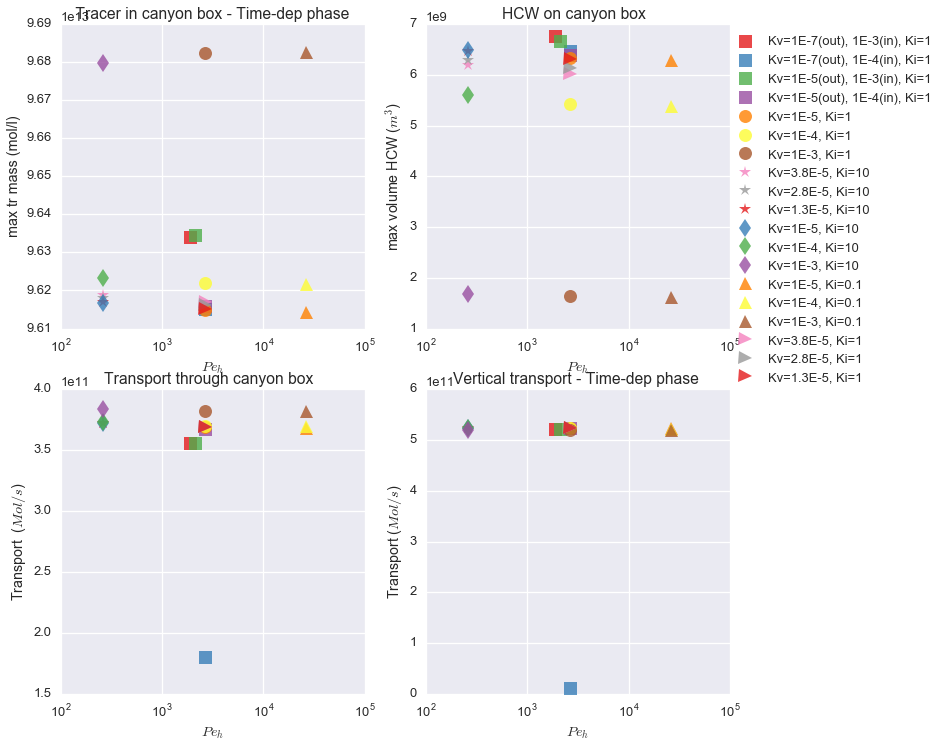

In [58]:
sns.set_palette( 'Set1',9)
fig42=plt.figure(figsize=(12,12))

marker = ['s','s','s','s','o','o','o','*','*','*','d','d','d','^','^','^','>','>','>']
jj=0

indexList = [0,1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21]

    
# TIME INTEGRATED CROSS-SHELF TRANSPORT
for ii,tr,wat,trans,vert in zip(indexList, TrOnShList,HWCList,totalList,verticalList):
    ax1 = plt.subplot(2,2,1)
    plt.plot( Peh[ii] ,np.max(tr[:10]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('max tr mass (mol/l)')
    plt.xlabel('$Pe_h$')
    plt.title(' Tracer in canyon box - Time-dep phase ')
    ax1.set_xscale("log", nonposy='clip')
    
    ax2 = plt.subplot(2,2,2)
    plt.plot(Peh[ii] , np.nanmax(wat[:10]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('max volume HCW ($m^3$)')
    plt.xlabel('$Pe_h$')
    plt.title('HCW on canyon box  ')
    ax2.set_xscale("log", nonposy='clip')
    

    ax3 = plt.subplot(2,2,3)
    plt.plot(Peh[ii] , np.nanmax((trans[:10]+vert[:10])),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Transport  ($Mol/s$)')
    plt.xlabel('$Pe_h$')
    plt.title('Transport through canyon box  ')
    ax3.set_xscale("log", nonposy='clip')
    
    
    ax4 = plt.subplot(2,2,4)
    plt.plot(Peh[ii] , np.nanmax(vert[:10]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Transport ($Mol/s$)')
    plt.xlabel('$Pe_h$')
    plt.title('Vertical transport - Time-dep phase ')
    ax4.set_xscale("log", nonposy='clip')
    jj = jj+1


ax2.legend(loc ='upper right', bbox_to_anchor=(1.7,1))
#ax2.legend(loc =0)

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


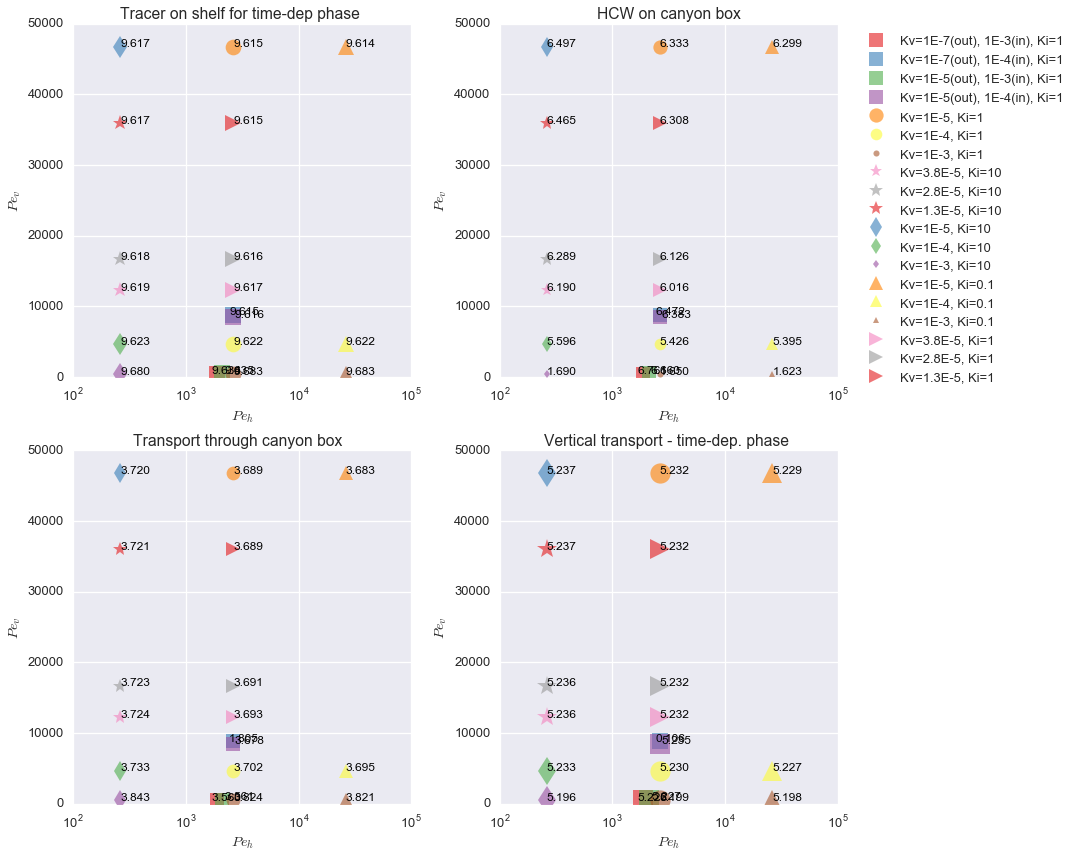

In [62]:
sns.set_palette( 'Set1',9)
fig42=plt.figure(figsize=(12,12))

marker = ['s','s','s','s','o','o','o','*','*','*','d','d','d','^','^','^','>','>','>']
jj=0

indexList = [0,1,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19,20,21]

    
# ADVECTIVE PHASE ONLY - TIME INTEGRATED CROSS-SHELF TRANSPORT
for ii,tr,wat,trans,vert in zip(indexList, TrOnShList,HWCList,totalList,verticalList):
    
    ax1 = plt.subplot(2,2,1)
    msize = (np.max(tr)/1.E13)+6
    plt.plot(Peh[ii] , Pev[ii],marker[jj],markersize = msize , label = labels[ii],alpha = 0.6)
    strnum = ('%1.3f' %(np.max(tr[:10]/1.E13)))
    if ii == 3:
        pl.text(Peh[ii]+100, Pev[ii]+10, strnum, color="black", fontsize=12)
    elif ii == 2:
        pl.text(Peh[ii]+100, Pev[ii]+20, strnum, color="black", fontsize=12)
    elif ii == 0:
        pl.text(Peh[ii]-200, Pev[ii]+10, strnum, color="black", fontsize=12)
    elif ii == 1:
        pl.text(Peh[ii]-200, Pev[ii]+20, strnum, color="black", fontsize=12)
    else:
        pl.text(Peh[ii], Pev[ii], strnum, color="black", fontsize=12)

    plt.ylabel('$Pe_v$')
    plt.xlabel('$Pe_h$')
    plt.title('Tracer on shelf for time-dep phase ')
    ax1.set_xscale("log", nonposy='clip')
    
    ax2 = plt.subplot(2,2,2)
    msize = (np.max(wat[18])/1.E9)+6
    plt.plot(Peh[ii] , Pev[ii],marker[jj],markersize = msize , label = labels[ii],alpha = 0.6)
    strnum = ('%1.3f' %(np.nanmax(wat[:10]/1.E9)))
    if ii == 3:
        pl.text(Peh[ii]+100, Pev[ii]+10, strnum, color="black", fontsize=12)
    elif ii == 2:
        pl.text(Peh[ii]+100, Pev[ii]+20, strnum, color="black", fontsize=12)
    elif ii == 0:
        pl.text(Peh[ii]-200, Pev[ii]+10, strnum, color="black", fontsize=12)
    elif ii == 1:
        pl.text(Peh[ii]-200, Pev[ii]+20, strnum, color="black", fontsize=12)
    else:
        pl.text(Peh[ii], Pev[ii], strnum, color="black", fontsize=12)
    plt.ylabel('$Pe_v$')
    plt.xlabel('$Pe_h$')
    plt.title('HCW on canyon box')
    ax2.set_xscale("log", nonposy='clip')
    

    ax3 = plt.subplot(2,2,3)
    msize = (np.max(trans)/1.E11)+12
    plt.plot(Peh[ii] , Pev[ii],marker[jj],markersize = msize , label = labels[ii],alpha = 0.6)
    strnum = ('%1.3f' %(np.max((trans[:10]+vert[:10])/1.E11)))
    if ii == 3:
        pl.text(Peh[ii]+100, Pev[ii]+10, strnum, color="black", fontsize=12)
    elif ii == 2:
        pl.text(Peh[ii]+100, Pev[ii]+20, strnum, color="black", fontsize=12)
    elif ii == 0:
        pl.text(Peh[ii]-200, Pev[ii]+10, strnum, color="black", fontsize=12)
    elif ii == 1:
        pl.text(Peh[ii]-200, Pev[ii]+20, strnum, color="black", fontsize=12)
    else:
        pl.text(Peh[ii], Pev[ii], strnum, color="black", fontsize=12) 
    plt.ylabel('$Pe_v$')
    plt.xlabel('$Pe_h$')
    plt.title('Transport through canyon box  ')
    ax3.set_xscale("log", nonposy='clip')
    
    
    ax4 = plt.subplot(2,2,4)
    msize = (np.max(vert)/1.E11)+15
    plt.plot(Peh[ii] , Pev[ii],marker[jj],markersize = msize , label = labels[ii],alpha = 0.6)
    strnum = ('%1.3f' %(np.max(vert[:10]/1.E11)))
    if ii == 3:
        pl.text(Peh[ii]+100, Pev[ii]+10, strnum, color="black", fontsize=12)
    elif ii == 2:
        pl.text(Peh[ii]+100, Pev[ii]+20, strnum, color="black", fontsize=12)
    elif ii == 0:
        pl.text(Peh[ii]-200, Pev[ii]+10, strnum, color="black", fontsize=12)
    elif ii == 1:
        pl.text(Peh[ii]-200, Pev[ii]+20, strnum, color="black", fontsize=12)
    else:
        pl.text(Peh[ii], Pev[ii], strnum, color="black", fontsize=12)
    
    plt.ylabel('$Pe_v$')
    plt.xlabel('$Pe_h$')
    plt.title('Vertical transport - time-dep. phase ')
    ax4.set_xscale("log", nonposy='clip')
    jj = jj+1

plt.tight_layout()
ax2.legend(loc ='upper right', bbox_to_anchor=(1.7,1))
#ax2.legend(loc =0)


In [34]:
np.mean([1E-5,1E-3])

0.00050500000000000002